In [1]:
import pandas as pd

In [2]:
city = pd.read_csv(r"C:\Users\steph\Downloads\Data Glacier\DataSets-main\data\clean_city_data.csv")

In [3]:
city.columns

Index(['Unnamed: 0', 'City', 'Population', 'Users'], dtype='object')

In [4]:
city.shape

(20, 4)

In [5]:
city.head()

,Unnamed: 0,City,Population,Users
0,0,New York Ny,"8,405,837","302,149"
1,1,Chicago Il,"1,955,130","164,468"
2,2,Los Angeles Ca,"1,595,037","144,132"
3,3,Miami Fl,"1,339,155","17,675"
4,4,Silicon Valley,"1,177,609","27,247"


In [6]:
#drop "unamed:0"

In [7]:
city = city.drop(columns=['Unnamed: 0'])

In [8]:
city.head()

,City,Population,Users
0,New York Ny,"8,405,837","302,149"
1,Chicago Il,"1,955,130","164,468"
2,Los Angeles Ca,"1,595,037","144,132"
3,Miami Fl,"1,339,155","17,675"
4,Silicon Valley,"1,177,609","27,247"


In [9]:
unique_cities_city = city['City'].unique()

In [10]:
unique_cities_city

array(['New York Ny', 'Chicago Il', 'Los Angeles Ca', 'Miami Fl',
       'Silicon Valley', 'Orange County', 'San Diego Ca', 'Phoenix Az',
       'Dallas Tx', 'Atlanta Ga', 'Denver Co', 'Austin Tx', 'Seattle Wa',
       'Tucson Az', 'San Francisco Ca', 'Sacramento Ca', 'Pittsburgh Pa',
       'Washington Dc', 'Nashville Tn', 'Boston Ma'], dtype=object)

In [11]:
# remove city abbreviations

In [12]:
# Mapping dictionary to replace city names with the desired names
city_name_mapping = {
    'New York Ny': 'New York',
    'Chicago Il': 'Chicago',
    'Los Angeles Ca': 'Los Angeles',
    'Miami Fl': 'Miami',
    'Silicon Valley': 'Silicon Valley',
    'Orange County': 'Orange County',
    'San Diego Ca': 'San Diego',
    'Phoenix Az': 'Phoenix',
    'Dallas Tx': 'Dallas',
    'Atlanta Ga': 'Atlanta',
    'Denver Co': 'Denver',
    'Austin Tx': 'Austin',
    'Seattle Wa': 'Seattle',
    'Tucson Az': 'Tucson',
    'San Francisco Ca': 'San Francisco',
    'Sacramento Ca': 'Sacramento',
    'Pittsburgh Pa': 'Pittsburgh',
    'Washington Dc': 'Washington',
    'Nashville Tn': 'Nashville',
    'Boston Ma': 'Boston'
}

# Apply the mapping to the 'City' column
city['City'] = city['City'].replace(city_name_mapping)

# Display the unique cities to verify the changes
print("Unique cities after applying the mapping:\n", city['City'].unique())


Unique cities after applying the mapping:
 ['New York' 'Chicago' 'Los Angeles' 'Miami' 'Silicon Valley'
 'Orange County' 'San Diego' 'Phoenix' 'Dallas' 'Atlanta' 'Denver'
 'Austin' 'Seattle' 'Tucson' 'San Francisco' 'Sacramento' 'Pittsburgh'
 'Washington' 'Nashville' 'Boston']


In [13]:
city.head(n=20)

,City,Population,Users
0,New York,"8,405,837","302,149"
1,Chicago,"1,955,130","164,468"
2,Los Angeles,"1,595,037","144,132"
3,Miami,"1,339,155","17,675"
4,Silicon Valley,"1,177,609","27,247"
5,Orange County,"1,030,185","12,994"
6,San Diego,"959,307","69,995"
7,Phoenix,"943,999","6,133"
8,Dallas,"942,908","22,157"
9,Atlanta,"814,885","24,701"


In [14]:
city.dtypes

City          object
Population    object
Users         object
dtype: object

In [15]:
# change datatypes of population and users

In [16]:
# Step 1: Remove commas from 'Population' and 'Users' columns
city['Population'] = city['Population'].str.replace(',', '')
city['Users'] = city['Users'].str.replace(',', '')

# Step 2: Convert 'Population' and 'Users' columns to integers
city['Population'] = city['Population'].astype(int)
city['Users'] = city['Users'].astype(int)

# Verify the changes
print(city.dtypes)
print(city)

City          object
Population     int64
Users          int64
dtype: object
              City  Population   Users
0         New York     8405837  302149
1          Chicago     1955130  164468
2      Los Angeles     1595037  144132
3            Miami     1339155   17675
4   Silicon Valley     1177609   27247
5    Orange County     1030185   12994
6        San Diego      959307   69995
7          Phoenix      943999    6133
8           Dallas      942908   22157
9          Atlanta      814885   24701
10          Denver      754233   12421
11          Austin      698371   14978
12         Seattle      671238   25063
13          Tucson      631442    5712
14   San Francisco      629591  213609
15      Sacramento      545776    7044
16      Pittsburgh      542085    3643
17      Washington      418859  127001
18       Nashville      327225    9270
19          Boston      248968   80021


In [17]:
missing_values = city.isnull().sum()

# Display the missing values
print("Missing values in the city dataset:\n", missing_values)

Missing values in the city dataset:
 City          0
Population    0
Users         0
dtype: int64


In [18]:
duplicates = city.duplicated().sum()

# Display the number of duplicate rows
print(f"Number of duplicate rows in the city dataset: {duplicates}")

Number of duplicate rows in the city dataset: 0


In [19]:
# check for outliers

import numpy as np

# Function to detect outliers using the IQR method
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Check for outliers in 'Population' and 'Users' columns
population_outliers = detect_outliers(city['Population'])
users_outliers = detect_outliers(city['Users'])

# Display the outliers
print("Outliers in Population column:\n", population_outliers)
print("\nOutliers in Users column:\n", users_outliers)

Outliers in Population column:
 0    8405837
1    1955130
Name: Population, dtype: int64

Outliers in Users column:
 0     302149
14    213609
Name: Users, dtype: int64


In [20]:
customer = pd.read_csv(r"C:\Users\steph\Downloads\Data Glacier\DataSets-main\data\clean_customer_data.csv")

In [21]:
customer.columns

Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')

In [22]:
customer.shape

(49171, 4)

In [23]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [24]:
# check for missing values
missing_values_customer = customer.isnull().sum()
print("Missing values in the customer dataset:\n", missing_values_customer)

Missing values in the customer dataset:
 Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64


In [25]:
duplicates_customer = customer.duplicated().sum()

# Display the number of duplicate rows
print(f"Number of duplicate rows in the customer dataset: {duplicates_customer}")

Number of duplicate rows in the customer dataset: 0


In [26]:
customer.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [27]:
# check for outliers
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Check for outliers in 'Age' and 'Income (USD/Month)' columns
age_outliers = detect_outliers(customer['Age'])
income_outliers = detect_outliers(customer['Income (USD/Month)'])

# Display the outliers
print("Outliers in Age column:\n", age_outliers)
print("\nOutliers in Income (USD/Month) column:\n", income_outliers)

Outliers in Age column:
 Series([], Name: Age, dtype: int64)

Outliers in Income (USD/Month) column:
 Series([], Name: Income (USD/Month), dtype: int64)


In [28]:
# check min and max age
min_age = customer['Age'].min()
max_age = customer['Age'].max()

print(f"The minimum age in the dataset is: {min_age}")
print(f"The maximum age in the dataset is: {max_age}")

The minimum age in the dataset is: 18
The maximum age in the dataset is: 65


In [29]:
# check min and max income
min_income = customer['Income (USD/Month)'].min()
max_income = customer['Income (USD/Month)'].max()

print(f"The minimum income in the dataset is: {min_income}")
print(f"The maximum income in the dataset is: {max_income}")

The minimum income in the dataset is: 2000
The maximum income in the dataset is: 35000


In [30]:
# Step 1: Define age bins and labels based on the provided range
age_bins = [18, 25, 35, 45, 55, 65]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65']

# Step 2: Create a new column 'Age Group' based on the defined bins
customer['Age Group'] = pd.cut(customer['Age'], bins=age_bins, labels=age_labels, right=True)

# Step 3: Define income bins and labels based on the provided range
income_bins = [2000, 10000, 20000, 30000, 35000]
income_labels = ['2000-10000', '10001-20000', '20001-30000', '30001-35000']

# Step 4: Create a new column 'Income Category' based on the defined bins
customer['Income Category'] = pd.cut(customer['Income (USD/Month)'], bins=income_bins, labels=income_labels, right=True)

In [31]:
# Step 5: Preview the new columns
print(customer[['Age', 'Age Group', 'Income (USD/Month)', 'Income Category']].head())

   Age Age Group  Income (USD/Month) Income Category
0   28     26-35               10813     10001-20000
1   27     26-35                9237      2000-10000
2   53     46-55               11242     10001-20000
3   23     18-25               23327     20001-30000
4   33     26-35                8536      2000-10000


In [32]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month),Age Group,Income Category
0,29290,Male,28,10813,26-35,10001-20000
1,27703,Male,27,9237,26-35,2000-10000
2,28712,Male,53,11242,46-55,10001-20000
3,28020,Male,23,23327,18-25,20001-30000
4,27182,Male,33,8536,26-35,2000-10000


In [33]:
weather = pd.read_csv(r"C:\Users\steph\Downloads\Data Glacier\DataSets-main\weather_data.csv")

In [34]:
weather.shape

(1048575, 14)

In [35]:
weather.columns

Index(['EventId', 'Type', 'Severity', 'StartTime(UTC)', 'EndTime(UTC)',
       'Precipitation(in)', 'TimeZone', 'AirportCode', 'LocationLat',
       'LocationLng', 'City', 'County', 'State', 'ZipCode'],
      dtype='object')

In [36]:
weather.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,W-1,Snow,Light,1/6/2016 23:14,1/7/2016 0:34,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,W-2,Snow,Light,1/7/2016 4:14,1/7/2016 4:54,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,W-3,Snow,Light,1/7/2016 5:54,1/7/2016 15:34,0.03,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,W-4,Snow,Light,1/8/2016 5:34,1/8/2016 5:54,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,W-5,Snow,Light,1/8/2016 13:54,1/8/2016 15:54,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


In [37]:
# Drop the specified columns from the weather dataset
weather = weather.drop(columns=['EventId', 'EndTime(UTC)', 'Precipitation(in)', 'TimeZone', 'AirportCode', 
                                'LocationLat', 'LocationLng', 'County', 'State', 'ZipCode'])

# Display the remaining columns to verify
print(weather.columns)

Index(['Type', 'Severity', 'StartTime(UTC)', 'City'], dtype='object')


In [38]:
weather.head()

,Type,Severity,StartTime(UTC),City
0,Snow,Light,1/6/2016 23:14,Saguache
1,Snow,Light,1/7/2016 4:14,Saguache
2,Snow,Light,1/7/2016 5:54,Saguache
3,Snow,Light,1/8/2016 5:34,Saguache
4,Snow,Light,1/8/2016 13:54,Saguache


In [39]:
# Find the unique cities in the weather dataset
cities = weather['City'].unique()

# Display the unique cities
print("Unique cities in the weather dataset:\n", cities)

Unique cities in the weather dataset:
 ['Saguache' 'Altus' 'Albert Lea' 'Baton Rouge' 'Sparta' 'Driggs'
 'Grand Rapids' 'Hutchinson' 'Kemmerer' 'Pittsfield' 'Kansas City' 'Tulsa'
 'Las Cruces' 'Davis' 'Roebuck' 'Sanford' 'Westerly' 'Worcester'
 'Charlotte' 'Williamsburg' 'Milwaukee' 'East Haven' 'Scappoose'
 'Dickinson' 'Redwood Falls' 'Troutdale' 'Hinckley' 'Freedom' 'Angel Fire'
 'Jamestown' 'Alexandria' 'Alamosa' 'Green' 'Brookings' 'Williams'
 'Carson City' 'Bloomfield' 'El Paso' 'Pine Bluffs' 'Peachtree City'
 'Marthasville' 'Greenwood' 'Minneapolis' 'Fort Hood' 'Jerome' 'La Grande'
 'Kimball' 'Lees Summit' 'Oak Ridge' 'Saint Paul' 'Tonopah' 'Boonville'
 'Florala' 'Palestine' nan 'Stuttgart' 'Massena' 'Wheeling' 'Peoria'
 'Oakes' 'Tacoma' 'Leadville' 'Clarinda' 'Muncie' 'North Kingstown'
 'Saint George' 'Hillsville' 'Fort Myers' 'North Dansville' 'Bluefield'
 'Jesup' 'Moselle' 'Virginia Beach' 'Walla Walla' 'Calumet' 'Bethel'
 'Albertville' 'New Cumberland' 'Rolla' 'Windsor' 'Ely'

In [40]:
# Cities we want to keep
cities_to_keep = ['New York', 'Chicago', 'Los Angeles', 'Miami', 'Silicon Valley', 
                  'Orange County', 'San Diego', 'Phoenix', 'Dallas', 'Atlanta', 
                  'Denver', 'Austin', 'Seattle', 'Tucson', 'San Francisco', 
                  'Sacramento', 'Pittsburgh', 'Washington', 'Nashville', 'Boston']

# Filter the weather dataset to keep only the rows with these cities
weather_filtered = weather[weather['City'].isin(cities_to_keep)]

# Display the unique cities in the filtered dataset to verify
print("Unique cities in the filtered weather dataset:\n", weather_filtered['City'].unique())

Unique cities in the filtered weather dataset:
 ['Pittsburgh' 'New York']


In [41]:
# Ensure the weather dataset contains only the specified cities
cities_to_keep = ['Pittsburgh', 'New York']

# Filter the weather dataset
weather = weather[weather['City'].isin(cities_to_keep)]

In [42]:
weather.shape

(9750, 4)

In [43]:
weather.head()

,Type,Severity,StartTime(UTC),City
920819,Snow,Light,1/1/2016 10:51,Pittsburgh
920820,Snow,Light,1/1/2016 13:51,Pittsburgh
920821,Snow,Light,1/3/2016 22:51,Pittsburgh
920822,Snow,Light,1/4/2016 11:51,Pittsburgh
920823,Rain,Light,1/8/2016 18:51,Pittsburgh


In [44]:
weather.dtypes

Type              object
Severity          object
StartTime(UTC)    object
City              object
dtype: object

In [45]:
# Convert StartTime(UTC) to datetime format and extract the date, renaming it to WeatherDate
weather_filtered['WeatherDate'] = pd.to_datetime(weather_filtered['StartTime(UTC)']).dt.date

# Drop the original StartTime(UTC) column
weather_filtered = weather_filtered.drop(columns=['StartTime(UTC)'])

# Display the updated dataframe to verify
print(weather_filtered.head())

        Type Severity        City WeatherDate
920819  Snow    Light  Pittsburgh  2016-01-01
920820  Snow    Light  Pittsburgh  2016-01-01
920821  Snow    Light  Pittsburgh  2016-01-03
920822  Snow    Light  Pittsburgh  2016-01-04
920823  Rain    Light  Pittsburgh  2016-01-08


In [46]:
# Define the mappings for Type and Severity
type_mapping = {
    'Storm': 4,
    'Snow': 3,
    'Hail': 3,
    'Rain': 2,
    'Fog': 2,
    'Cold': 1,
    'Precipitation': 1
}

severity_mapping = {
    'Severe': 4,
    'Heavy': 3,
    'Moderate': 2,
    'Light': 1,
    'Other': 1,
    'UNK': 1
}

# Apply the mappings to the weather data
weather_filtered['Type Score'] = weather_filtered['Type'].map(type_mapping)
weather_filtered['Severity Score'] = weather_filtered['Severity'].map(severity_mapping)

# Handle any missing mappings by filling NaNs with 0
weather_filtered['Type Score'] = weather_filtered['Type Score'].fillna(0)
weather_filtered['Severity Score'] = weather_filtered['Severity Score'].fillna(0)

# Compute the Weather Severity Index
weather_filtered['Weather Severity Index'] = weather_filtered['Type Score'] + weather_filtered['Severity Score']

# Display the updated weather_filtered DataFrame
print(weather_filtered[['City', 'WeatherDate', 'Type', 'Severity', 'Weather Severity Index']].head())

              City WeatherDate  Type Severity  Weather Severity Index
920819  Pittsburgh  2016-01-01  Snow    Light                       4
920820  Pittsburgh  2016-01-01  Snow    Light                       4
920821  Pittsburgh  2016-01-03  Snow    Light                       4
920822  Pittsburgh  2016-01-04  Snow    Light                       4
920823  Pittsburgh  2016-01-08  Rain    Light                       3


In [47]:
weather_filtered.shape

(9750, 7)

In [48]:
# ensure timelines in weather is from 31/01/2016 to 31/12/2018

In [49]:
# Convert WeatherDate to datetime if it isn't already
weather_filtered['WeatherDate'] = pd.to_datetime(weather_filtered['WeatherDate'])

# Define the start and end dates for the filter as datetime objects
start_date = pd.Timestamp('2016-01-31')
end_date = pd.Timestamp('2018-12-31')

# Filter the DataFrame to include only rows within the specified date range
weather_filtered = weather_filtered[(weather_filtered['WeatherDate'] >= start_date) & 
                                    (weather_filtered['WeatherDate'] <= end_date)]

# Display the filtered DataFrame
print(weather_filtered[['City', 'WeatherDate', 'Type', 'Severity', 'Weather Severity Index']].head())

              City WeatherDate  Type  Severity  Weather Severity Index
920872  Pittsburgh  2016-02-01  Rain     Light                       3
920873  Pittsburgh  2016-02-03  Rain     Light                       3
920874  Pittsburgh  2016-02-03  Rain     Light                       3
920875  Pittsburgh  2016-02-03  Rain  Moderate                       4
920876  Pittsburgh  2016-02-03  Rain     Light                       3


In [50]:
# Step 1: Define a function to determine the season based on the date
def get_season(date):
    if date >= pd.Timestamp(date.year, 12, 21) or date < pd.Timestamp(date.year, 3, 20):
        return 'Winter'
    elif date >= pd.Timestamp(date.year, 3, 20) and date < pd.Timestamp(date.year, 6, 21):
        return 'Spring'
    elif date >= pd.Timestamp(date.year, 6, 21) and date < pd.Timestamp(date.year, 9, 22):
        return 'Summer'
    else:
        return 'Fall'

# Step 2: Apply the function to create the "Season Identifier" column
weather_filtered['Season Identifier'] = weather_filtered['WeatherDate'].apply(get_season)

# Step 3: Display the updated weather_filtered DataFrame
print(weather_filtered[['City', 'WeatherDate', 'Season Identifier']].head())

              City WeatherDate Season Identifier
920872  Pittsburgh  2016-02-01            Winter
920873  Pittsburgh  2016-02-03            Winter
920874  Pittsburgh  2016-02-03            Winter
920875  Pittsburgh  2016-02-03            Winter
920876  Pittsburgh  2016-02-03            Winter


In [51]:
weather_filtered.shape

(3964, 8)

In [52]:
holiday = pd.read_csv(r"C:\Users\steph\Downloads\Data Glacier\DataSets-main\data\clean_holiday_data.csv")

In [53]:
holiday.head()

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008


In [54]:
# Drop the unnecessary columns
holiday = holiday.drop(columns=['WeekDay', 'Month', 'Day', 'Year'])

# Optionally rename 'Date' to 'Holiday Date' for clarity
holiday.rename(columns={'Date': 'Holiday Date'}, inplace=True)

# Display the first few rows to verify the changes
print(holiday.head())

  Holiday Date      Holiday
0   2004-07-04  4th of July
1   2005-07-04  4th of July
2   2006-07-04  4th of July
3   2007-07-04  4th of July
4   2008-07-04  4th of July


In [55]:
# Convert 'Holiday Date' to datetime format
holiday['Holiday Date'] = pd.to_datetime(holiday['Holiday Date'])

# Define the date range
start_date = pd.to_datetime('2016-01-31')
end_date = pd.to_datetime('2018-12-31')

# Filter the holiday data within the specified date range
holiday_filtered = holiday[(holiday['Holiday Date'] >= start_date) & (holiday['Holiday Date'] <= end_date)]

# Display the first few rows to verify the changes
print(holiday_filtered.head())

   Holiday Date        Holiday
12   2016-07-04    4th of July
13   2017-07-04    4th of July
14   2018-07-04    4th of July
30   2016-12-25  Christmas Day
31   2017-12-25  Christmas Day


In [56]:
holiday.shape

(342, 2)

In [57]:
population = pd.read_csv(r"C:\Users\steph\Downloads\Data Glacier\DataSets-main\data\population.csv",
                         encoding='latin1')

In [58]:
population.head()

,city,2016 population,source,2017 population,source.1,2018 population,source.2
0,New York,8.469 million,https://www.google.com/search?q=2016+new+york+...,8.438 million,https://www.google.com/search?q=2017+new+york+...,8.397 million,https://www.google.com/search?q=2018+new+york+...
1,Chicago,2.716 million,https://www.google.com/search?q=2016+ochicago+...,2.71 million,https://www.google.com/search?q=2017+chicago+p...,2.701 million,https://www.google.com/search?q=2018+chicago+p...
2,Los Angeles,3.958 million,https://www.google.com/search?q=2016+los+angel...,3.975 million,https://www.google.com/search?q=2017+los+angel...,3.981 million,https://www.google.com/search?q=2018+los+angel...
3,Miami,"448,789",https://www.google.com/search?q=2016+miami+pop...,"455,925",https://www.google.com/search?q=2017+miami+pop...,"461,962",https://www.google.com/search?q=2018+miami+pop...
4,Silicon Valley,3.5 million,https://www.google.com/search?q=2016+silicon+v...,3.51 million,https://www.google.com/search?q=2016+silicon+v...,3.52 million,https://www.google.com/search?q=2016+silicon+v...


In [59]:
# Drop the columns that are not needed
population = population.drop(columns=['source', 'source.1', 'source.2'])

# Display the updated DataFrame
print(population.head())

             city 2016 population 2017 population 2018 population
0        New York   8.469 million   8.438 million   8.397 million
1         Chicago   2.716 million    2.71 million   2.701 million
2     Los Angeles   3.958 million   3.975 million   3.981 million
3           Miami         448,789         455,925         461,962
4  Silicon Valley     3.5 million    3.51 million    3.52 million


In [60]:
# Function to convert population strings to numeric values
def convert_population(pop_str):
    # Remove commas
    pop_str = pop_str.replace(',', '')
    # Check for "million" and convert to numerical value
    if 'million' in pop_str:
        return float(pop_str.replace('million', '').strip()) * 1_000_000
    else:
        return int(pop_str)

# Apply the conversion to the population columns
population['2016 population'] = population['2016 population'].apply(convert_population)
population['2017 population'] = population['2017 population'].apply(convert_population)
population['2018 population'] = population['2018 population'].apply(convert_population)

# Display the cleaned DataFrame
print(population.head())

             city  2016 population  2017 population  2018 population
0        New York        8469000.0        8438000.0        8397000.0
1         Chicago        2716000.0        2710000.0        2701000.0
2     Los Angeles        3958000.0        3975000.0        3981000.0
3           Miami         448789.0         455925.0         461962.0
4  Silicon Valley        3500000.0        3510000.0        3520000.0


In [61]:
# Calculate the growth rate between 2016 and 2017
population['2016-2017 Growth Rate'] = ((population['2017 population'] - population['2016 population']) / population['2016 population']) * 100

# Calculate the growth rate between 2017 and 2018
population['2017-2018 Growth Rate'] = ((population['2018 population'] - population['2017 population']) / population['2017 population']) * 100

# Calculate the average growth rate
population['Average Growth Rate'] = (population['2016-2017 Growth Rate'] + population['2017-2018 Growth Rate']) / 2

# Drop the intermediate growth rate columns
population = population.drop(columns=['2016-2017 Growth Rate', '2017-2018 Growth Rate'])

# Display the updated DataFrame with the average growth rate
print(population[['city', 'Average Growth Rate']].head())

             city  Average Growth Rate
0        New York            -0.425969
1         Chicago            -0.276508
2     Los Angeles             0.290227
3           Miami             1.457089
4  Silicon Valley             0.285307


In [62]:
cab = pd.read_csv(r"C:\Users\steph\Downloads\Data Glacier\DataSets-main\data\clean_cab_data.csv")

In [63]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [64]:
cab.shape

(359392, 7)

In [65]:
# Step 1: Convert the 'Date of Travel' column to datetime format
cab['Date of Travel'] = pd.to_datetime(cab['Date of Travel'])

In [66]:
# Step 3: Create 'Price per KM' feature
cab['Price per KM'] = cab['Price Charged'] / cab['KM Travelled']

# Step 4: Create 'Profit per Trip' feature
cab['Profit per Trip'] = cab['Price Charged'] - cab['Cost of Trip']

In [67]:
# Step 5: Check for missing values
print("Missing values in cab dataset:\n", cab.isnull().sum())

Missing values in cab dataset:
 Transaction ID     0
Date of Travel     0
Company            0
City               0
KM Travelled       0
Price Charged      0
Cost of Trip       0
Price per KM       0
Profit per Trip    0
dtype: int64


In [68]:
# Step 6: Check for duplicates
print("Duplicate rows in cab dataset:", cab.duplicated().sum())

Duplicate rows in cab dataset: 0


In [69]:
# Find the unique city names in the cab dataset
unique_cities_cab = cab['City'].unique()
print("Unique cities in cab dataset:\n", unique_cities_cab)

Unique cities in cab dataset:
 ['ATLANTA GA' 'AUSTIN TX' 'BOSTON MA' 'CHICAGO IL' 'DALLAS TX' 'DENVER CO'
 'LOS ANGELES CA' 'MIAMI FL' 'NASHVILLE TN' 'NEW YORK NY' 'ORANGE COUNTY'
 'PHOENIX AZ' 'PITTSBURGH PA' 'SACRAMENTO CA' 'SAN DIEGO CA' 'SEATTLE WA'
 'SILICON VALLEY' 'TUCSON AZ' 'WASHINGTON DC']


In [70]:
# Define the mapping dictionary
city_mapping = {
    'ATLANTA GA': 'Atlanta',
    'AUSTIN TX': 'Austin',
    'BOSTON MA': 'Boston',
    'CHICAGO IL': 'Chicago',
    'DALLAS TX': 'Dallas',
    'DENVER CO': 'Denver',
    'LOS ANGELES CA': 'Los Angeles',
    'MIAMI FL': 'Miami',
    'NASHVILLE TN': 'Nashville',
    'NEW YORK NY': 'New York',
    'ORANGE COUNTY': 'Orange County',
    'PHOENIX AZ': 'Phoenix',
    'PITTSBURGH PA': 'Pittsburgh',
    'SACRAMENTO CA': 'Sacramento',
    'SAN DIEGO CA': 'San Diego',
    'SEATTLE WA': 'Seattle',
    'SILICON VALLEY': 'Silicon Valley',
    'TUCSON AZ': 'Tucson',
    'WASHINGTON DC': 'Washington'
}
# Apply the mapping to the 'City' column in the cab dataset
cab['City'] = cab['City'].map(city_mapping)

# Display the updated city names in the cab dataset to verify the changes
print("Updated city names in cab dataset:\n", cab['City'].unique())

Updated city names in cab dataset:
 ['Atlanta' 'Austin' 'Boston' 'Chicago' 'Dallas' 'Denver' 'Los Angeles'
 'Miami' 'Nashville' 'New York' 'Orange County' 'Phoenix' 'Pittsburgh'
 'Sacramento' 'San Diego' 'Seattle' 'Silicon Valley' 'Tucson' 'Washington']


In [71]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Price per KM,Profit per Trip
0,10000011,2016-01-08,Pink Cab,Atlanta,30.45,370.95,313.635,12.182266,57.315
1,10000012,2016-01-06,Pink Cab,Atlanta,28.62,358.52,334.854,12.526904,23.666
2,10000013,2016-01-02,Pink Cab,Atlanta,9.04,125.20,97.632,13.849558,27.568
3,10000014,2016-01-07,Pink Cab,Atlanta,33.17,377.40,351.602,11.377751,25.798
4,10000015,2016-01-03,Pink Cab,Atlanta,8.73,114.62,97.776,13.129439,16.844


In [72]:
# market shhare per city

In [73]:
# Calculate the total number of trips per city
total_trips_per_city = cab.groupby('City')['Transaction ID'].count()

In [74]:
# Calculate the number of trips per company in each city
trips_per_company_city = cab.groupby(['City', 'Company'])['Transaction ID'].count()

In [75]:
# Calculate market share by dividing trips per company by total trips per city
market_share = trips_per_company_city / total_trips_per_city

# Convert the resulting series to a DataFrame for easier merging
market_share = market_share.reset_index(name='Market Share')

# Display the market share data
print(market_share.head())

      City     Company  Market Share
0  Atlanta    Pink Cab      0.233161
1  Atlanta  Yellow Cab      0.766839
2   Austin    Pink Cab      0.381536
3   Austin  Yellow Cab      0.618464
4   Boston    Pink Cab      0.174660


In [76]:
# Merge the market share back into the cab dataset
cab = pd.merge(cab, market_share, how='left', on=['City', 'Company'])

# Display the updated cab dataset to verify the changes
print(cab.head())

   Transaction ID Date of Travel   Company     City  KM Travelled  \
0        10000011     2016-01-08  Pink Cab  Atlanta         30.45   
1        10000012     2016-01-06  Pink Cab  Atlanta         28.62   
2        10000013     2016-01-02  Pink Cab  Atlanta          9.04   
3        10000014     2016-01-07  Pink Cab  Atlanta         33.17   
4        10000015     2016-01-03  Pink Cab  Atlanta          8.73   

   Price Charged  Cost of Trip  Price per KM  Profit per Trip  Market Share  
0         370.95       313.635     12.182266           57.315      0.233161  
1         358.52       334.854     12.526904           23.666      0.233161  
2         125.20        97.632     13.849558           27.568      0.233161  
3         377.40       351.602     11.377751           25.798      0.233161  
4         114.62        97.776     13.129439           16.844      0.233161  


In [77]:
transaction = pd.read_csv(r"C:\Users\steph\Downloads\Data Glacier\DataSets-main\data\clean_transaction_data.csv")

In [78]:
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [79]:
# 1. Check for missing values
print("Missing values in transaction table:\n", transaction.isnull().sum())

Missing values in transaction table:
 Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64


In [80]:
# 2. Check for duplicates
print("Duplicate Transaction IDs:", transaction['Transaction ID'].duplicated().sum())

Duplicate Transaction IDs: 0


In [81]:
transaction.shape

(440098, 3)

In [82]:
# 3. Verify Data Types
print("Data types in transaction table:\n", transaction.dtypes)

Data types in transaction table:
 Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object


In [83]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month),Age Group,Income Category
0,29290,Male,28,10813,26-35,10001-20000
1,27703,Male,27,9237,26-35,2000-10000
2,28712,Male,53,11242,46-55,10001-20000
3,28020,Male,23,23327,18-25,20001-30000
4,27182,Male,33,8536,26-35,2000-10000


In [84]:
# master table

In [85]:
print(f"the columns in ciity are: {city.columns}")

the columns in ciity are: Index(['City', 'Population', 'Users'], dtype='object')


In [86]:
print(f"the columns in customer are: {customer.columns}")

the columns in customer are: Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)', 'Age Group',
       'Income Category'],
      dtype='object')


In [87]:
print(f"the columns in weather_filtered are: {weather_filtered.columns}")

the columns in weather_filtered are: Index(['Type', 'Severity', 'City', 'WeatherDate', 'Type Score',
       'Severity Score', 'Weather Severity Index', 'Season Identifier'],
      dtype='object')


In [88]:
print(f"the columns in holiday are: {holiday.columns}")

the columns in holiday are: Index(['Holiday Date', 'Holiday'], dtype='object')


In [89]:
print(f"the columns in population are: {population.columns}")

the columns in population are: Index(['city', '2016 population', '2017 population', '2018 population',
       'Average Growth Rate'],
      dtype='object')


In [90]:
print(f"the columns in cab are: {cab.columns}")

the columns in cab are: Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Price per KM', 'Profit per Trip',
       'Market Share'],
      dtype='object')


In [91]:
print(f"the columns in transaction are: {transaction.columns}")

the columns in transaction are: Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object')


In [92]:
# Step 1: Merge Population with City
# Merge city-specific population and growth information with the city dataset.
master_data = pd.merge(city, population, how='left', left_on='City', right_on='city')

In [93]:
# Step 2: Merge Cab with Master Data
# Combine the cab trip details with the master data, including population and city-specific information.
master_data = pd.merge(cab, master_data, how='left', on='City')

In [94]:
# Step 3: Merge Customer with Transaction
# Combine customer demographic details with their respective transactions.
customer_transaction = pd.merge(transaction, customer, how='left', on='Customer ID')

In [95]:
# Step 4: Merge Customer Transaction with Cab Master Data
# Integrate customer transaction details into the master dataset, linking each cab trip to customer demographics.
master_data = pd.merge(master_data, customer_transaction, how='left', on='Transaction ID')

In [96]:
# Step 5: Merge Weather Data with Master Data
# Add weather information based on the city and date of travel to the master dataset.
master_data = pd.merge(master_data, weather_filtered, how='left', 
                       left_on=['City', 'Date of Travel'], 
                       right_on=['City', 'WeatherDate'])

In [97]:
# Step 6: Merge Holiday Data with Master Data
# Include holiday information in the master dataset based on the date of travel.
master_data = pd.merge(master_data, holiday, how='left', 
                       left_on='Date of Travel', 
                       right_on='Holiday Date')

In [98]:
master_data.shape

(497913, 33)

In [99]:
master_data.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Price per KM', 'Profit per Trip',
       'Market Share', 'Population', 'Users', 'city', '2016 population',
       '2017 population', '2018 population', 'Average Growth Rate',
       'Customer ID', 'Payment_Mode', 'Gender', 'Age', 'Income (USD/Month)',
       'Age Group', 'Income Category', 'Type', 'Severity', 'WeatherDate',
       'Type Score', 'Severity Score', 'Weather Severity Index',
       'Season Identifier', 'Holiday Date', 'Holiday'],
      dtype='object')

In [100]:
master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Price per KM,Profit per Trip,Market Share,...,Income Category,Type,Severity,WeatherDate,Type Score,Severity Score,Weather Severity Index,Season Identifier,Holiday Date,Holiday
0,10000011,2016-01-08,Pink Cab,Atlanta,30.45,370.95,313.635,12.182266,57.315,0.233161,...,10001-20000,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN
1,10000012,2016-01-06,Pink Cab,Atlanta,28.62,358.52,334.854,12.526904,23.666,0.233161,...,2000-10000,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN
2,10000013,2016-01-02,Pink Cab,Atlanta,9.04,125.20,97.632,13.849558,27.568,0.233161,...,10001-20000,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN
3,10000014,2016-01-07,Pink Cab,Atlanta,33.17,377.40,351.602,11.377751,25.798,0.233161,...,20001-30000,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN
4,10000015,2016-01-03,Pink Cab,Atlanta,8.73,114.62,97.776,13.129439,16.844,0.233161,...,2000-10000,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN


In [101]:
# Display all columns for a single record
pd.set_option('display.max_columns', None)  # Ensure all columns are shown
print(master_data.iloc[0])  # Display the first record

Transaction ID                       10000011
Date of Travel            2016-01-08 00:00:00
Company                              Pink Cab
City                                  Atlanta
KM Travelled                            30.45
Price Charged                          370.95
Cost of Trip                          313.635
Price per KM                        12.182266
Profit per Trip                        57.315
Market Share                         0.233161
Population                             814885
Users                                   24701
city                                  Atlanta
2016 population                      479590.0
2017 population                      492121.0
2018 population                      498772.0
Average Growth Rate                  1.982177
Customer ID                             29290
Payment_Mode                             Card
Gender                                   Male
Age                                        28
Income (USD/Month)                

In [102]:
# Create the Holiday flag feature
master_data['Holiday flag'] = master_data['Holiday'].apply(lambda x: 1 if pd.notna(x) else 0)

# Display the updated record with the new feature
print(master_data[['Date of Travel', 'Holiday', 'Holiday flag']].head())

  Date of Travel Holiday  Holiday flag
0     2016-01-08     NaN             0
1     2016-01-06     NaN             0
2     2016-01-02     NaN             0
3     2016-01-07     NaN             0
4     2016-01-03     NaN             0


In [103]:
# check weather_filter_data

In [104]:
# Check the range of dates in master_data
min_date_master = master_data['Date of Travel'].min()
max_date_master = master_data['Date of Travel'].max()

# Check the range of dates in weather_filtered
min_date_weather = weather_filtered['WeatherDate'].min()
max_date_weather = weather_filtered['WeatherDate'].max()

print(f"Date range in master_data: {min_date_master} to {max_date_master}")
print(f"Date range in weather_filtered: {min_date_weather} to {max_date_weather}")

Date range in master_data: 2016-01-02 00:00:00 to 2018-12-31 00:00:00
Date range in weather_filtered: 2016-02-01 00:00:00 to 2018-12-31 00:00:00


In [105]:
# Check for common dates between master_data and weather_filtered
common_dates = set(master_data['Date of Travel']).intersection(set(weather_filtered['WeatherDate']))
print(f"Number of common dates: {len(common_dates)}")

Number of common dates: 728


In [106]:
# Check for city name overlaps
common_cities = set(master_data['City']).intersection(set(weather_filtered['City']))
print(f"Common cities: {common_cities}")

Common cities: {'New York', 'Pittsburgh'}


In [107]:
# Filter master_data for records in Pittsburgh and New York where weather data is available
filtered_records = master_data[
    (master_data['City'].isin(['Pittsburgh', 'New York'])) &
    (master_data['Weather Severity Index'].notna())
]

# Display the filtered records
print(filtered_records)


        Transaction ID Date of Travel     Company        City  KM Travelled  \
3879          10004934     2016-02-01  Yellow Cab    New York         15.68   
3891          10004946     2016-02-01  Yellow Cab    New York         31.80   
3899          10004954     2016-02-01  Yellow Cab    New York         24.15   
3900          10004955     2016-02-01  Yellow Cab    New York         38.00   
3916          10004971     2016-02-01  Yellow Cab    New York         23.69   
...                ...            ...         ...         ...           ...   
497508        10439412     2018-01-04  Yellow Cab  Pittsburgh         31.92   
497509        10439412     2018-01-04  Yellow Cab  Pittsburgh         31.92   
497511        10439415     2018-01-04  Yellow Cab  Pittsburgh         23.94   
497512        10439415     2018-01-04  Yellow Cab  Pittsburgh         23.94   
497513        10439415     2018-01-04  Yellow Cab  Pittsburgh         23.94   

        Price Charged  Cost of Trip  Price per KM  

In [108]:
master_data.shape

(497913, 34)

In [109]:
# check for repeat customers
# Group the data by Customer ID and Company, and count the number of trips each customer made with each company
repeat_customer_data = master_data.groupby(['Customer ID', 'Company']).size().reset_index(name='Trip Count')

# Create the Repeat Customer flag: 1 if Trip Count > 1, otherwise 0
repeat_customer_data['Repeat Customer Flag'] = repeat_customer_data['Trip Count'].apply(lambda x: 1 if x > 1 else 0)

# Merge the Repeat Customer flag back into the master_data
master_data = pd.merge(master_data, repeat_customer_data[['Customer ID', 'Company', 'Repeat Customer Flag']],
                       on=['Customer ID', 'Company'], how='left')

# Fill any missing values with 0 (in case a customer is not found in repeat_customer_data)
master_data['Repeat Customer Flag'] = master_data['Repeat Customer Flag'].fillna(0)

# Convert the flag to integer type for consistency
master_data['Repeat Customer Flag'] = master_data['Repeat Customer Flag'].astype(int)

# Display the updated DataFrame to verify
print(master_data[['Customer ID', 'Company', 'Repeat Customer Flag']].head())


   Customer ID   Company  Repeat Customer Flag
0        29290  Pink Cab                     0
1        27703  Pink Cab                     1
2        28712  Pink Cab                     0
3        28020  Pink Cab                     1
4        27182  Pink Cab                     0


In [110]:
master_data.shape

(497913, 35)

In [111]:
master_data.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Price per KM', 'Profit per Trip',
       'Market Share', 'Population', 'Users', 'city', '2016 population',
       '2017 population', '2018 population', 'Average Growth Rate',
       'Customer ID', 'Payment_Mode', 'Gender', 'Age', 'Income (USD/Month)',
       'Age Group', 'Income Category', 'Type', 'Severity', 'WeatherDate',
       'Type Score', 'Severity Score', 'Weather Severity Index',
       'Season Identifier', 'Holiday Date', 'Holiday', 'Holiday flag',
       'Repeat Customer Flag'],
      dtype='object')

In [112]:
# Drop the specified columns
master_data = master_data.drop(columns=['2016 population', '2017 population', '2018 population'])

In [113]:
master_data.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Price per KM', 'Profit per Trip',
       'Market Share', 'Population', 'Users', 'city', 'Average Growth Rate',
       'Customer ID', 'Payment_Mode', 'Gender', 'Age', 'Income (USD/Month)',
       'Age Group', 'Income Category', 'Type', 'Severity', 'WeatherDate',
       'Type Score', 'Severity Score', 'Weather Severity Index',
       'Season Identifier', 'Holiday Date', 'Holiday', 'Holiday flag',
       'Repeat Customer Flag'],
      dtype='object')

In [114]:
master_data.shape

(497913, 32)

In [115]:
master_data.to_csv(r"C:\Users\steph\Downloads\Data Glacier\DataSets-main\master_data.csv", index=False)

### EDA

In [116]:
import matplotlib.pyplot as plt
import pandas as pd

### Market share comparison

In [117]:
import pandas as pd

# Calculate total profit, total rides, and profit per ride for each company
summary = master_data.groupby('Company').agg({
    'Profit per Trip': 'sum',
    'Transaction ID': 'count'
}).rename(columns={'Profit per Trip': 'Total Profit', 'Transaction ID': 'Total Rides'})

summary['Profit per Ride'] = summary['Total Profit'] / summary['Total Rides']

# Calculate the percentage of total profit for each company
summary['Percentage of Total Profit'] = (summary['Total Profit'] / summary['Total Profit'].sum()) * 100

# Display the summary table
summary.reset_index(inplace=True)
summary.columns = ['Company', 'Total Profit', 'Total Rides', 'Profit per Ride', 'Percentage of Total Profit']
summary


,Company,Total Profit,Total Rides,Profit per Ride,Percentage of Total Profit
0,Pink Cab,7.422380e+06,104971,70.708866,8.427558
1,Yellow Cab,8.065035e+07,392942,205.247466,91.572442


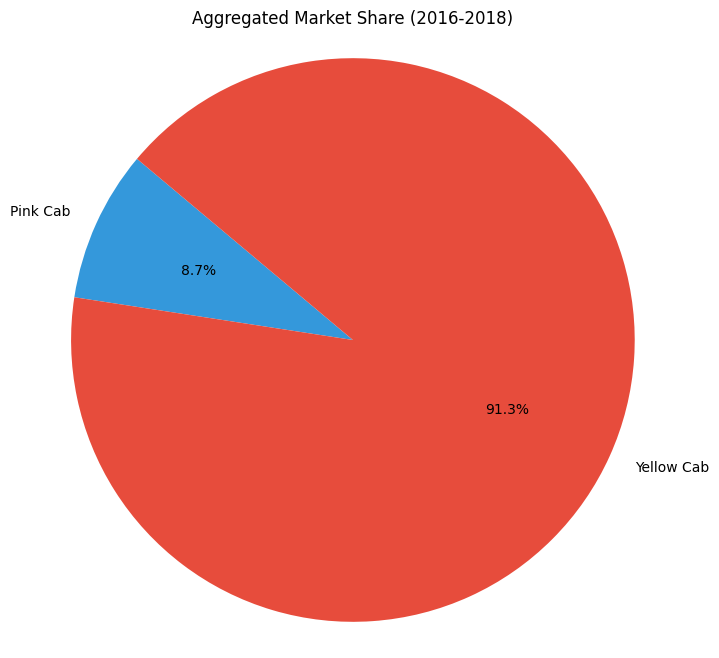

In [118]:
# Aggregate market share over all years
aggregated_market_share = master_data.groupby('Company').agg({
    'Market Share': 'sum'
}).reset_index()

# Plot the aggregated market share pie chart
plt.figure(figsize=(8, 8))
plt.pie(aggregated_market_share['Market Share'], labels=aggregated_market_share['Company'], autopct='%1.1f%%', startangle=140, colors=['#3498db', '#e74c3c'])
plt.title('Aggregated Market Share (2016-2018)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

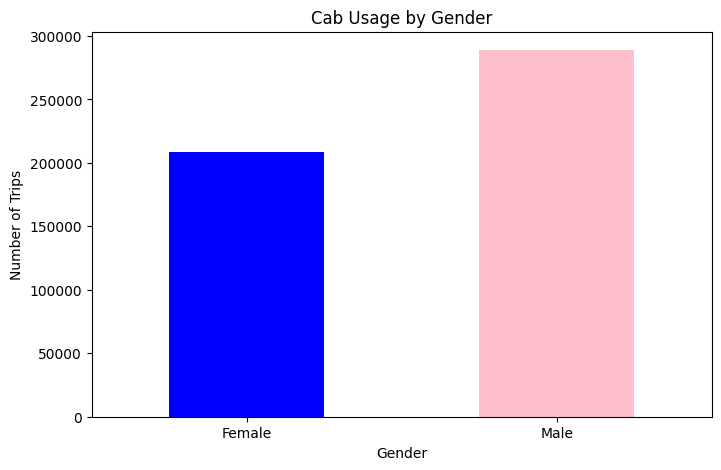

In [119]:
# Group the data by Gender and count the number of trips
gender_usage = master_data.groupby('Gender').size()

# Plot the distribution of trips by Gender
plt.figure(figsize=(8, 5))
gender_usage.plot(kind='bar', color=['blue', 'pink'])
plt.title('Cab Usage by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.savefig("C:/Users/steph/Downloads/Data Glacier/DataSets-main/data/charts/Cab_Usage_by_Income_Gender.png")

plt.show()


C:\Users\steph\AppData\Local\Temp\ipykernel_46380\3741919870.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_usage = master_data.groupby('Income Category').size()


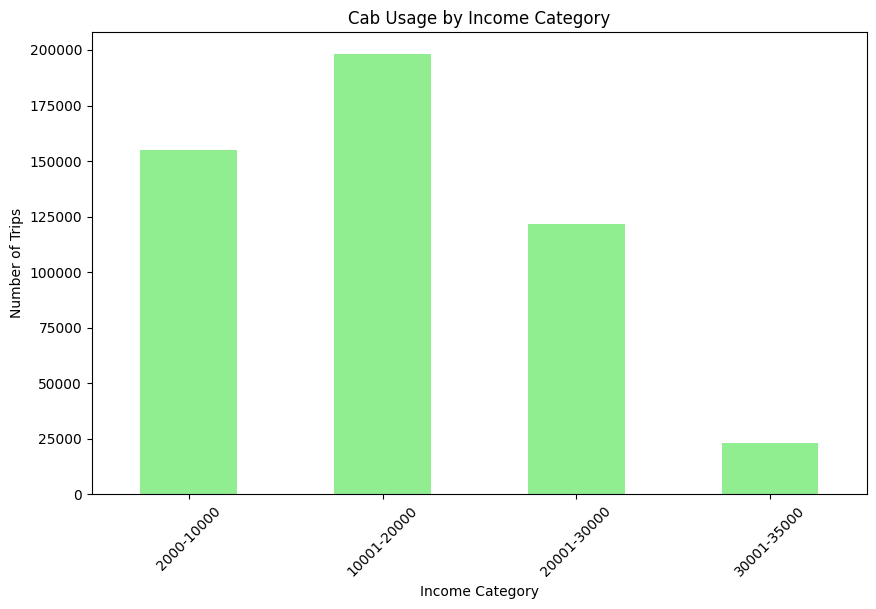

In [120]:
# Group the data by Income Category and count the number of trips
income_usage = master_data.groupby('Income Category').size()

# Plot the distribution of trips by Income Category
plt.figure(figsize=(10, 6))
income_usage.plot(kind='bar', color='lightgreen')
plt.title('Cab Usage by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.savefig("C:/Users/steph/Downloads/Data Glacier/DataSets-main/data/charts/Cab_Usage_by_Income_Category.png")

plt.show()


C:\Users\steph\AppData\Local\Temp\ipykernel_46380\2610426164.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demographics_usage = master_data.groupby(['Age Group', 'Gender', 'Income Category']).size().unstack()


<Figure size 1200x800 with 0 Axes>

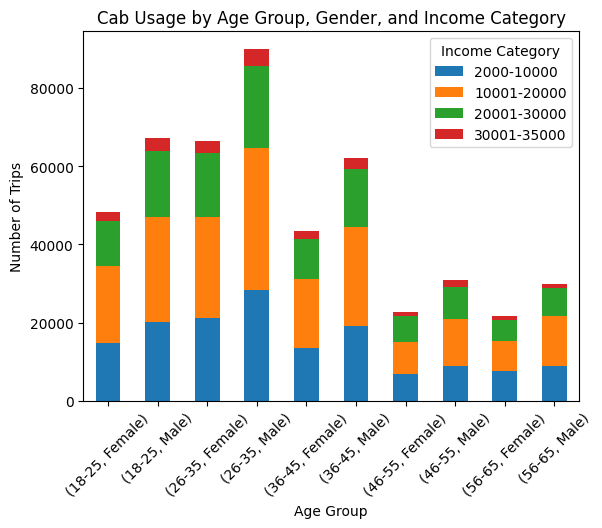

In [121]:
# Cross-reference Age Group, Gender, and Income Category
demographics_usage = master_data.groupby(['Age Group', 'Gender', 'Income Category']).size().unstack()

# Plot the cross-referenced demographics usage
plt.figure(figsize=(12, 8))
demographics_usage.plot(kind='bar', stacked=True)
plt.title('Cab Usage by Age Group, Gender, and Income Category')
plt.xlabel('Age Group')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.legend(title='Income Category')
plt.savefig("C:/Users/steph/Downloads/Data Glacier/DataSets-main/data/charts/Cab_Usage_by_Age_Group_Gender_and_Income_Category.png")

plt.show()


<Figure size 1000x600 with 0 Axes>

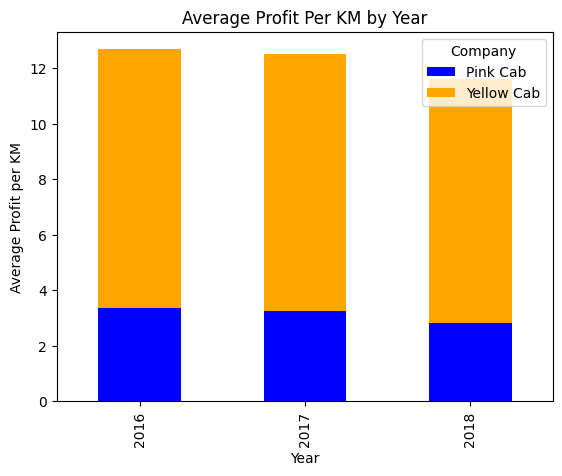

In [122]:
# Calculate average profit per KM by Company and Year
master_data['Year'] = master_data['Date of Travel'].dt.year
avg_profit_per_km = master_data.groupby(['Year', 'Company'])['Profit per Trip'].sum() / master_data.groupby(['Year', 'Company'])['KM Travelled'].sum()

# Plot Average Profit per KM by Year and Company
plt.figure(figsize=(10, 6))
avg_profit_per_km.unstack().plot(kind='bar', stacked=True, color=['blue', 'orange'])
plt.title('Average Profit Per KM by Year')
plt.xlabel('Year')
plt.ylabel('Average Profit per KM')
plt.show()


<Figure size 1400x800 with 0 Axes>

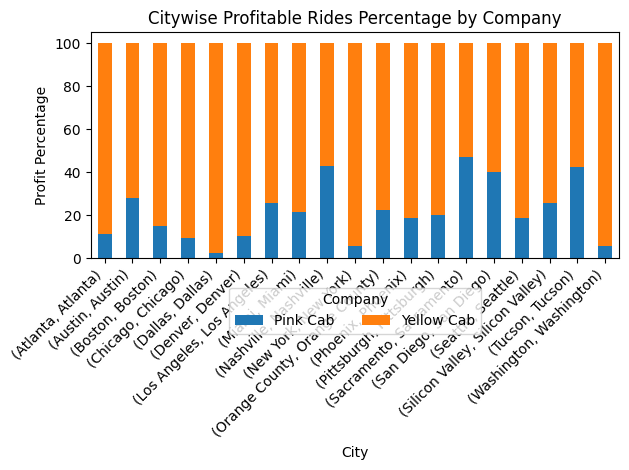

In [123]:
import matplotlib.pyplot as plt


# Group by City and Company and calculate the sum of Profit per Trip
city_profit_sum = master_data.groupby(['City', 'Company'])['Profit per Trip'].sum()

# Calculate the percentage of profit by city
city_profit_percentage = city_profit_sum.groupby(level=0).apply(lambda x: 100 * x / x.sum())

# Plotting with adjusted figure size and legend position
plt.figure(figsize=(14, 8))  # Increase the width and height of the figure
city_profit_percentage.unstack().plot(kind='bar', stacked=True)

plt.title('Citywise Profitable Rides Percentage by Company')
plt.xlabel('City')
plt.ylabel('Profit Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Company', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)  # Position legend below the plot
plt.tight_layout()  # Adjust subplots to fit into the figure area

plt.show()



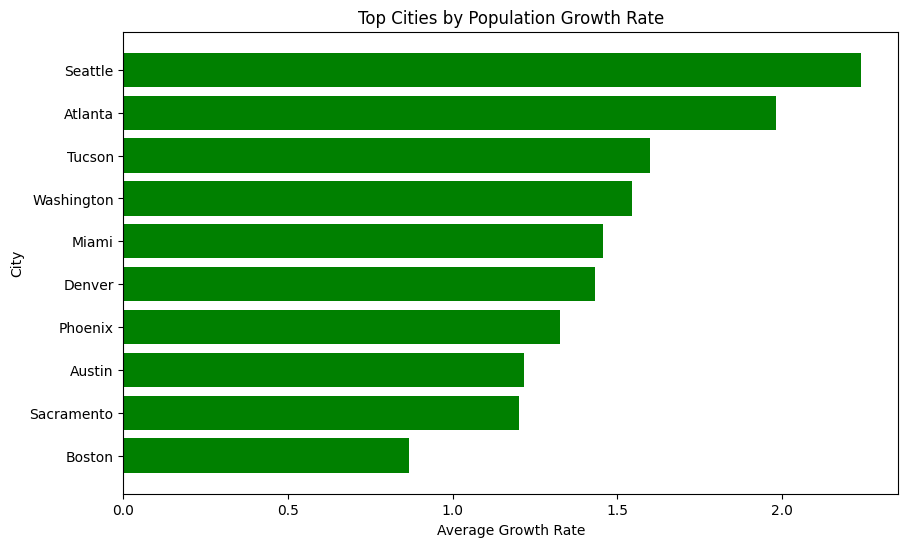

In [124]:
import matplotlib.pyplot as plt

top_growth_cities = master_data[['City', 'Average Growth Rate']].drop_duplicates()

# Sort the cities by Average Growth Rate in descending order
top_growth_cities = top_growth_cities.sort_values(by='Average Growth Rate', ascending=False)


# Select top cities for visualization (e.g., top 10)
top_10_growth_cities = top_growth_cities.head(10)

# Bar chart for visualization
plt.figure(figsize=(10, 6))
plt.barh(top_10_growth_cities['City'], top_10_growth_cities['Average Growth Rate'], color='green')
plt.title('Top Cities by Population Growth Rate')
plt.xlabel('Average Growth Rate')
plt.ylabel('City')
plt.gca().invert_yaxis()  # To have the highest growth city at the top

# Save and show the plot
plt.savefig(r"C:\Users\steph\Downloads\Data Glacier\DataSets-main\data\charts\top_cities_by_growth_rate.png")
plt.show()

The bar chart you've generated highlights the top cities by population growth rate. It shows that Seattle, Atlanta, and Tucson are leading in population growth, making them key areas where cab companies should focus their resources. Other cities like Washington, Miami, and Denver also show significant growth, indicating potential areas for expansion or increased service provision.

Interpretation: This chart shows the average population growth rate of different cities. Seattle leads with the highest growth rate, followed by Atlanta and Tucson. Cities with high population growth rates generally indicate a growing demand for services, including transportation. This could suggest that investing in cab services in these cities may yield higher returns due to increasing customer bases.

Recommendation: XYZ should consider investing in cab services in cities with higher population growth rates, such as Seattle, Atlanta, and Tucson. These cities are likely to experience increased demand for transportation services, making them potential hotspots for profitable cab operations.

In [125]:
# Bar Chart: Market Share by Year

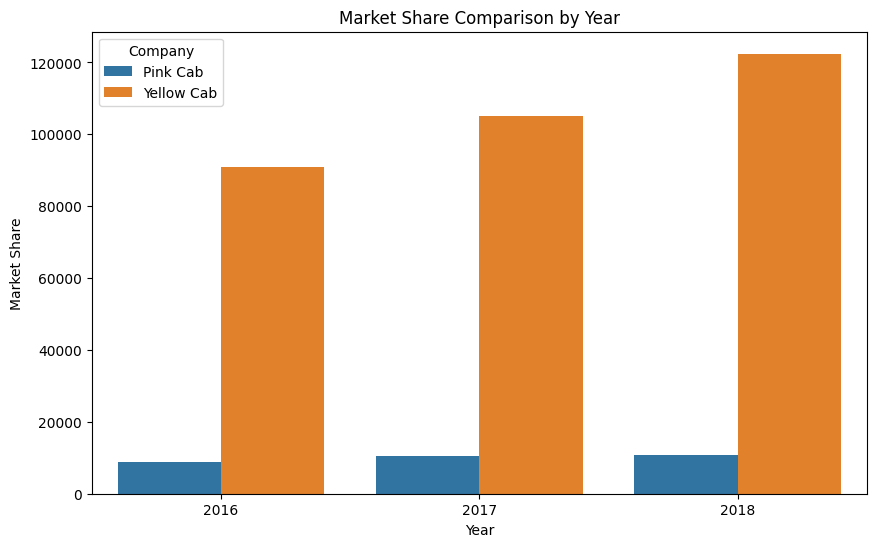

In [126]:
import seaborn as sns

# Aggregate market share by year and company
market_share_year = master_data.groupby(['Year', 'Company']).agg({
    'Market Share': 'sum'
}).reset_index()

# Plot the market share comparison bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=market_share_year, x='Year', y='Market Share', hue='Company')
plt.title('Market Share Comparison by Year')
plt.xlabel('Year')
plt.ylabel('Market Share')
plt.legend(title='Company')
plt.show()


### Yearly Profit Analysis

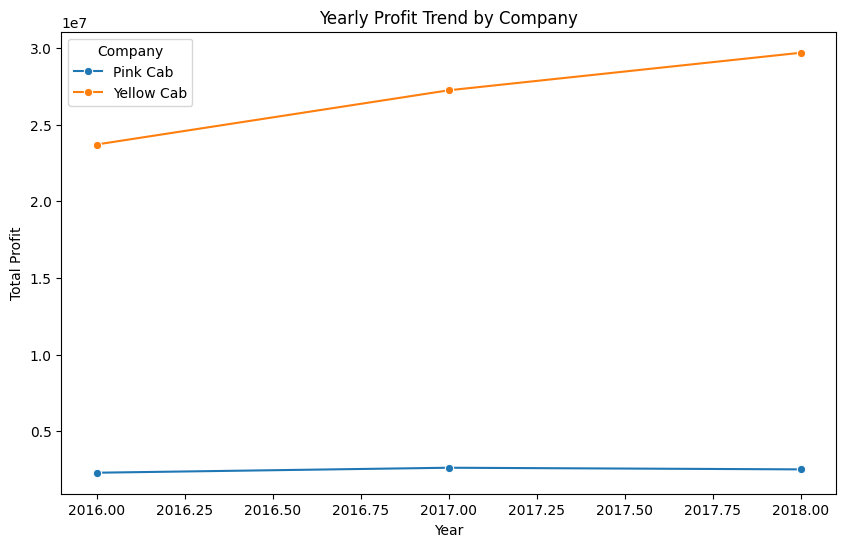

In [127]:
# Aggregate profit by year and company
profit_yearly = master_data.groupby(['Year', 'Company']).agg({
    'Profit per Trip': 'sum'
}).reset_index()

# Plot the yearly profit trend line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=profit_yearly, x='Year', y='Profit per Trip', hue='Company', marker='o')
plt.title('Yearly Profit Trend by Company')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.legend(title='Company')
plt.show()

### Hypothesis Testing

### Weather Impact on Cab Usage
Hypothesis 1: Adverse weather conditions (e.g., rain, snow) reduce the demand for cab services.

In [128]:
# Bar Chart - Number of Trips by Weather Condition and Company

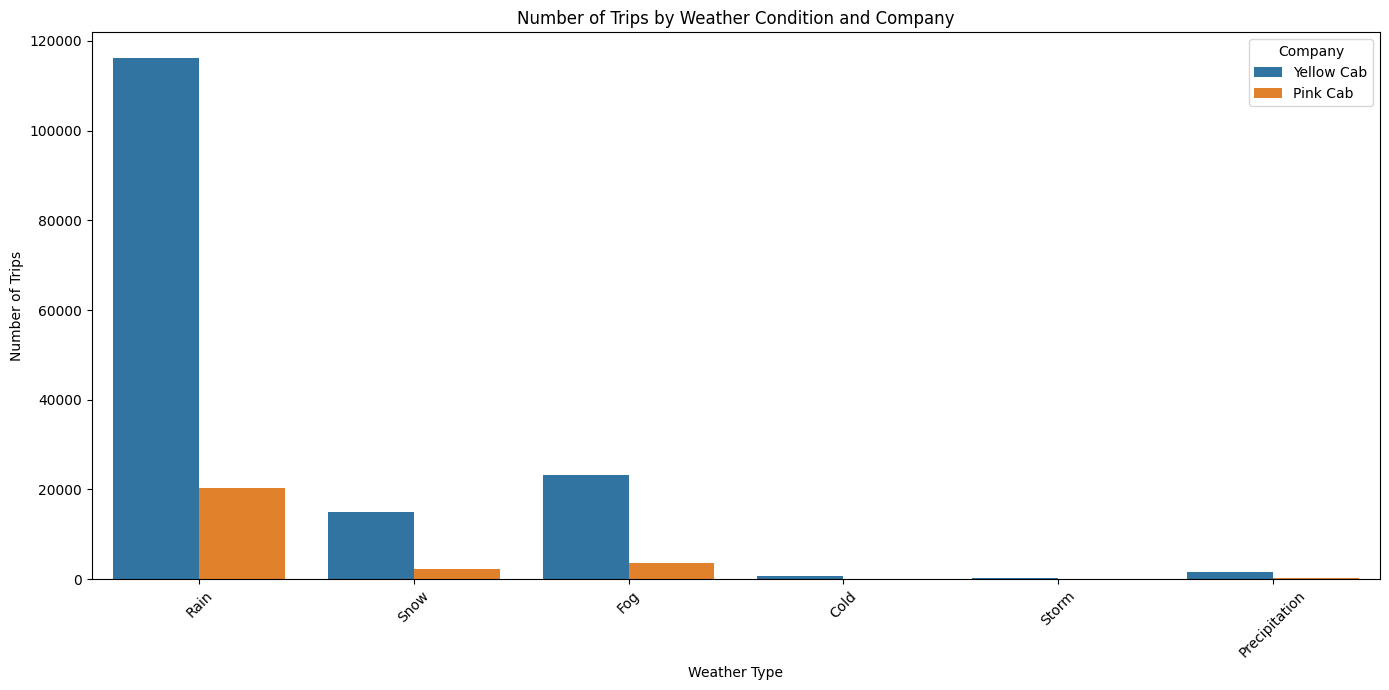

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out records with missing weather data
weather_data = master_data.dropna(subset=['Type'])

# Bar plot: Number of trips by weather type and company
plt.figure(figsize=(14, 7))
sns.countplot(data=weather_data, x='Type', hue='Company')
plt.title('Number of Trips by Weather Condition and Company')
plt.xlabel('Weather Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [130]:
# Box Plot - Distribution of KM Travelled by Weather Condition

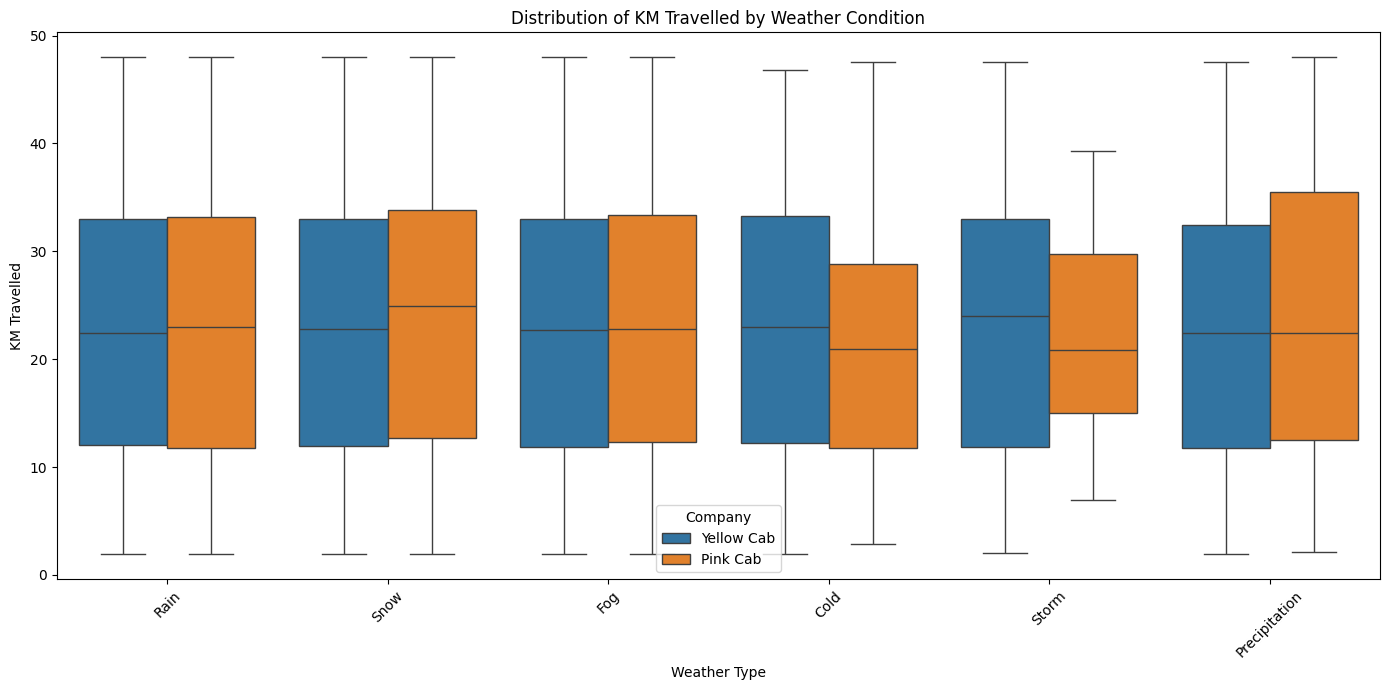

In [131]:
# Box plot: KM Travelled by weather type
plt.figure(figsize=(14, 7))
sns.boxplot(data=weather_data, x='Type', y='KM Travelled', hue='Company')
plt.title('Distribution of KM Travelled by Weather Condition')
plt.xlabel('Weather Type')
plt.ylabel('KM Travelled')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [132]:
# Scatter Plot - Profit per Trip by Weather Condition

C:\Users\steph\AppData\Local\Temp\ipykernel_46380\2251362953.py:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


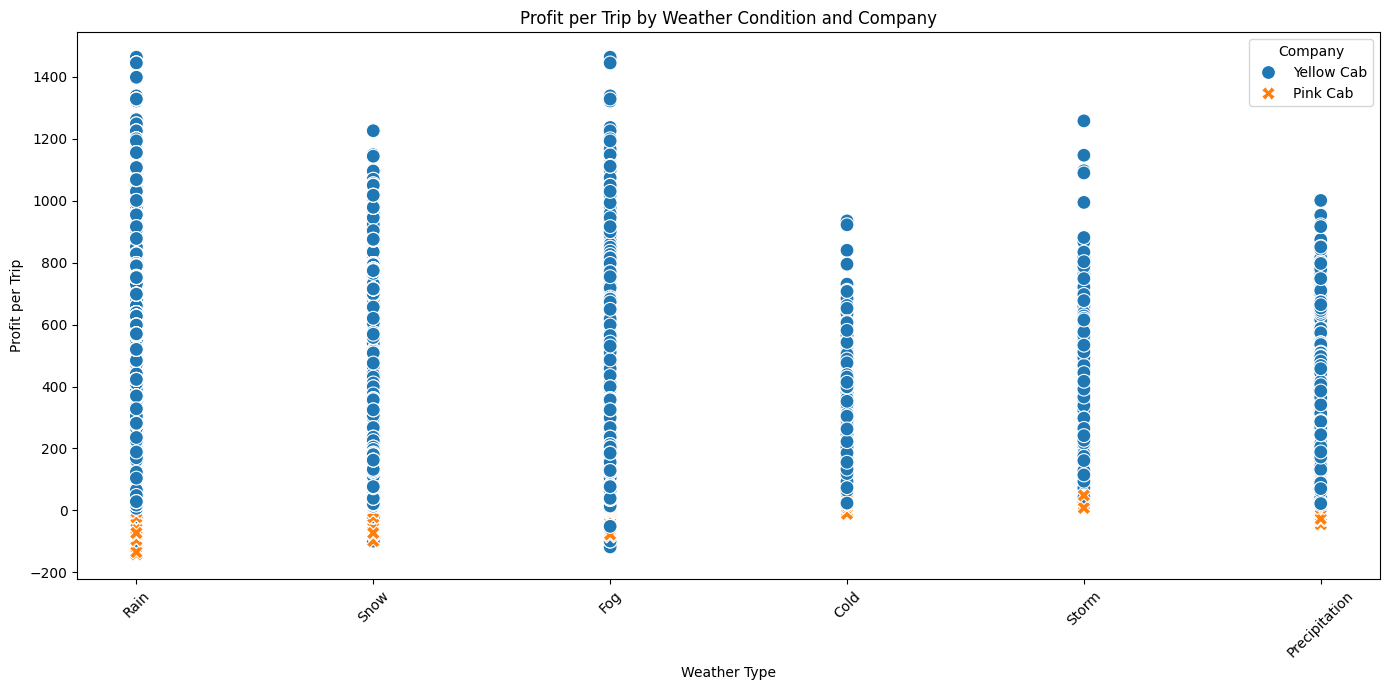

In [133]:
# Scatter plot: Profit per trip by weather type
plt.figure(figsize=(14, 7))
sns.scatterplot(data=weather_data, x='Type', y='Profit per Trip', hue='Company', style='Company', s=100)
plt.title('Profit per Trip by Weather Condition and Company')
plt.xlabel('Weather Type')
plt.ylabel('Profit per Trip')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Interpretation: This scatter plot shows the profit per trip for Yellow Cab and Pink Cab across various weather conditions. The data indicates that Yellow Cab consistently achieves higher profits per trip across all weather types, while Pink Cab shows significantly lower profit margins. The spread of profit values is much broader for Yellow Cab, suggesting higher variability but also greater potential for high-profit trips.

Recommendation: Yellow Cab demonstrates a stronger ability to generate higher profits per trip across different weather conditions. This consistency, especially under adverse weather conditions where demand for reliable transportation might increase, reinforces Yellow Cab as the better investment choice for XYZ.

### Hypothesis 1 Conclusion

The data does not support the hypothesis that adverse weather conditions reduce the demand for cab services. Instead, it indicates that cab usage remains high, particularly for Yellow Cab, during adverse weather.

Recommendation: XYZ should consider investing in Yellow Cab, as it shows resilience and profitability in various weather conditions, including adverse ones. This indicates a strong customer demand and operational efficiency that can lead to higher returns on investment.

### Holiday Impact on Cab Usage
Hypothesis 2: There is a higher demand for cab services during holidays.

In [134]:
# Bar Chart: Number of Trips on Holidays vs. Non-Holidays

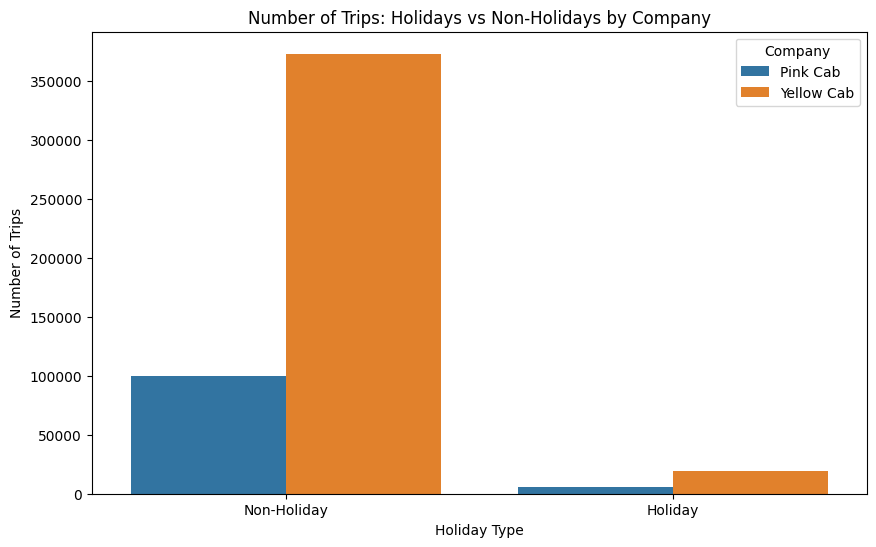

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by Holiday flag and Company, then count the number of trips
holiday_trip_count = master_data.groupby(['Holiday flag', 'Company']).size().reset_index(name='Number of Trips')

# Replace the Holiday flag with meaningful labels
holiday_trip_count['Holiday flag'] = holiday_trip_count['Holiday flag'].replace({0: 'Non-Holiday', 1: 'Holiday'})

# Plotting the number of trips
plt.figure(figsize=(10, 6))
sns.barplot(x='Holiday flag', y='Number of Trips', hue='Company', data=holiday_trip_count)
plt.title('Number of Trips: Holidays vs Non-Holidays by Company')
plt.ylabel('Number of Trips')
plt.xlabel('Holiday Type')
plt.show()


Interpretation:Both Pink Cab and Yellow Cab see a significant decrease in the number of trips during holidays compared to non-holidays. Yellow Cab has a particularly high number of trips on non-holidays, with a noticeable drop during holidays.

Recommendation:XYZ should focus on non-holiday periods for consistent demand. Investing in strategies to maintain or increase ridership during holidays might be necessary if holiday performance is a concern. Yellow Cab, with its strong non-holiday performance, could offer more stable returns.

In [136]:
# Box Plot: Profit per Trip on Holidays vs. Non-Holidays

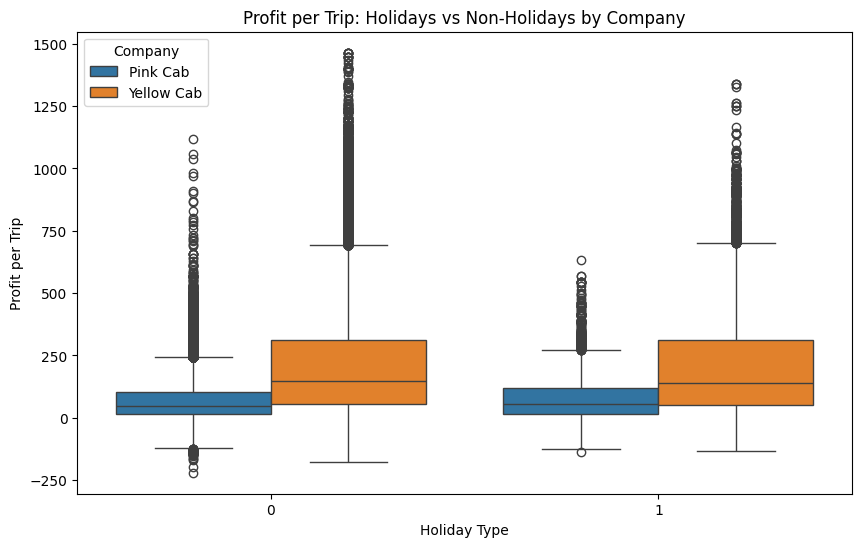

In [137]:
# Plotting the distribution of profit per trip on holidays vs non-holidays
plt.figure(figsize=(10, 6))
sns.boxplot(x='Holiday flag', y='Profit per Trip', hue='Company', data=master_data)
plt.title('Profit per Trip: Holidays vs Non-Holidays by Company')
plt.ylabel('Profit per Trip')
plt.xlabel('Holiday Type')
plt.show()


Interpretation: Yellow Cab consistently shows higher profits per trip compared to Pink Cab during both holidays and non-holidays. Profits for both companies are generally higher during non-holidays, but Yellow Cab demonstrates a more significant profit margin in both scenarios.

Recommendation: XYZ should consider investing in Yellow Cab due to its strong profit performance across both holiday and non-holiday periods. While profits are lower during holidays, Yellow Cab still maintains a competitive edge, suggesting it may offer more consistent and higher returns.

In [138]:
# Bar Chart: Total Profit on Holidays vs. Non-Holidays

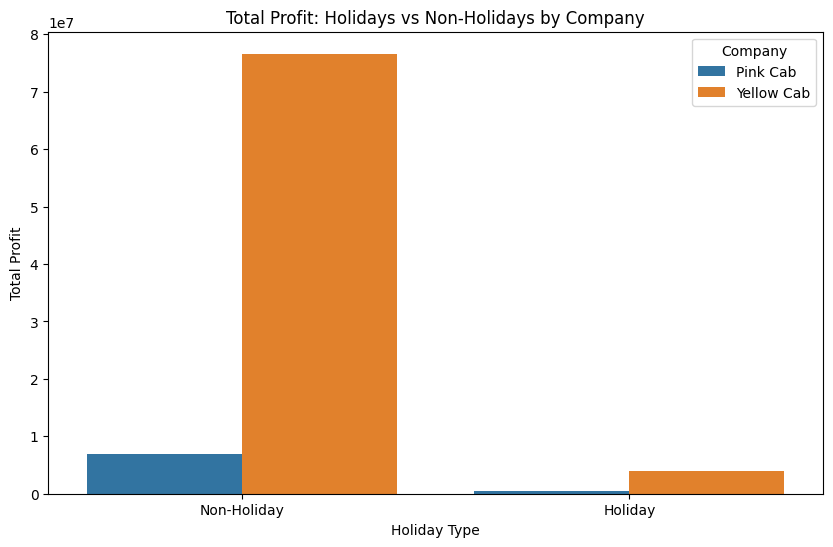

In [139]:
# Group data by Holiday flag and Company, then sum the profit per trip
holiday_profit_sum = master_data.groupby(['Holiday flag', 'Company'])['Profit per Trip'].sum().reset_index(name='Total Profit')

# Replace the Holiday flag with meaningful labels
holiday_profit_sum['Holiday flag'] = holiday_profit_sum['Holiday flag'].replace({0: 'Non-Holiday', 1: 'Holiday'})

# Plotting the total profit
plt.figure(figsize=(10, 6))
sns.barplot(x='Holiday flag', y='Total Profit', hue='Company', data=holiday_profit_sum)
plt.title('Total Profit: Holidays vs Non-Holidays by Company')
plt.ylabel('Total Profit')
plt.xlabel('Holiday Type')
plt.show()


Interpretation: The total profit for both Pink Cab and Yellow Cab is overwhelmingly higher during non-holidays compared to holidays. Yellow Cab generates significantly more profit than Pink Cab, especially during non-holiday periods.

Recommendation: XYZ should focus their investment on Yellow Cab, particularly during non-holiday periods, where the majority of profits are generated. Yellow Cab's consistent high-profit performance indicates a reliable return on investment.

### Hypothesis 2 Conclusion
The data does not support the hypothesis that there is a higher demand for cab services during holidays. In fact, both Pink Cab and Yellow Cab experience a significant decrease in the number of trips, profits per trip, and total profits during holidays compared to non-holidays. Yellow Cab, in particular, shows strong performance during non-holidays, indicating that demand is much higher outside of holiday periods.

Recommendation: XYZ should consider focusing investments on non-holiday periods, especially in Yellow Cab, which shows consistent profitability during these times. If increasing ridership during holidays is a goal, XYZ might need to implement targeted strategies or promotions to boost demand during these periods.

### Population Growth Influence:
Hypothesis 3: Cities with higher population growth rates have higher demand for cab services.

In [140]:
# Scatter Plot - To visualize the relationship between population growth rate and the number of cab trips in each city.

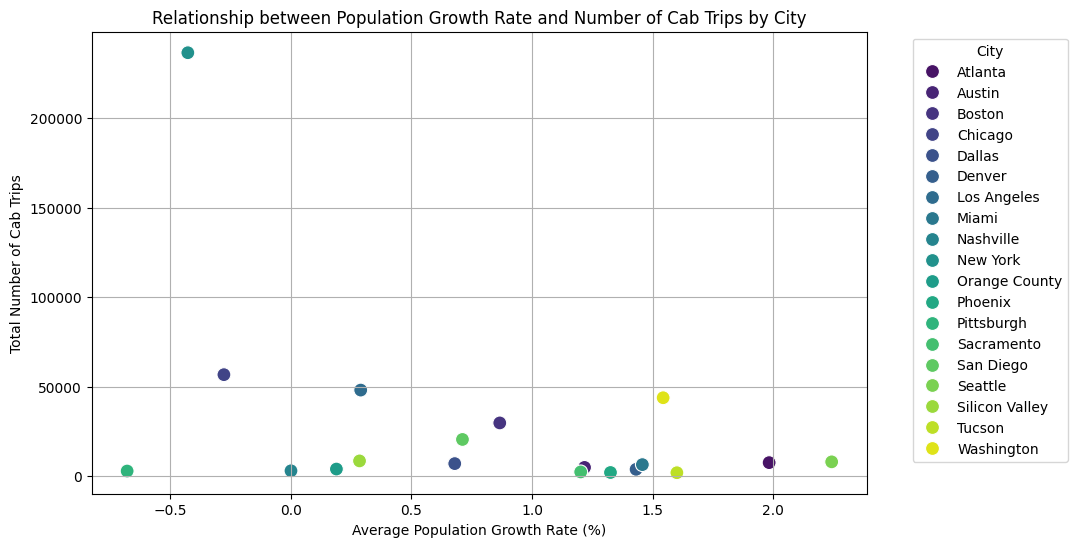

<Figure size 640x480 with 0 Axes>

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by city and calculate the total number of trips
city_trip_data = master_data.groupby('City').agg({
    'Transaction ID': 'count',
    'Average Growth Rate': 'mean'
}).rename(columns={'Transaction ID': 'Total Trips'}).reset_index()

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=city_trip_data, x='Average Growth Rate', y='Total Trips', hue='City', palette='viridis', s=100)
plt.title('Relationship between Population Growth Rate and Number of Cab Trips by City')
plt.xlabel('Average Population Growth Rate (%)')
plt.ylabel('Total Number of Cab Trips')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("C:/Users/steph/Downloads/Data Glacier/DataSets-main/data/charts/population_growth_vs_trips.png")


Interpretation: The scatter plot shows a weak relationship between the population growth rate and the number of cab trips across various cities. Cities with higher population growth rates, such as Seattle, Tucson, and Washington, do not necessarily correspond to a higher number of cab trips. Conversely, some cities with low or even negative population growth rates, like Los Angeles, have a relatively high number of cab trips.

Recommendation: XYZ should not rely solely on population growth rates when deciding where to invest in cab services. Instead, a more comprehensive analysis considering other factors, such as the demand for cab services, local competition, and economic conditions, should be conducted to make informed investment decisions.

In [142]:
# bar chart that ranks cities based on the total number of cab trips:

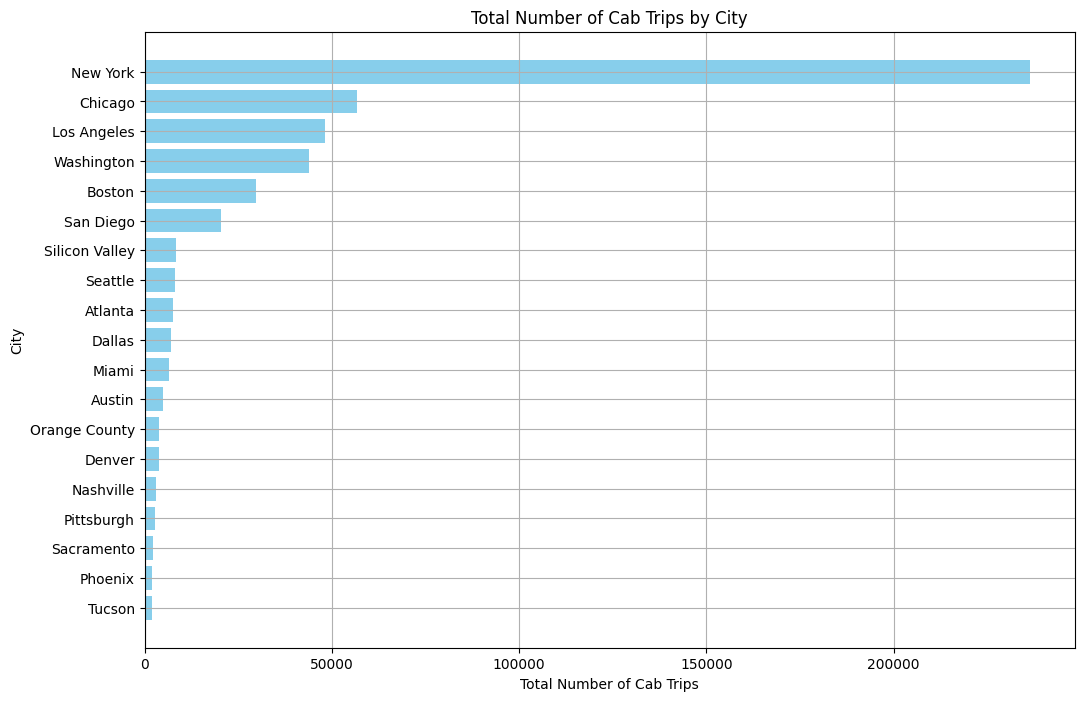

<Figure size 640x480 with 0 Axes>

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by city and calculate the total number of trips
city_trip_data = master_data.groupby('City').agg({
    'Transaction ID': 'count'
}).rename(columns={'Transaction ID': 'Total Trips'}).reset_index()

# Sort the cities by the total number of trips in descending order
city_trip_data = city_trip_data.sort_values(by='Total Trips', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.barh(city_trip_data['City'], city_trip_data['Total Trips'], color='skyblue')
plt.title('Total Number of Cab Trips by City')
plt.xlabel('Total Number of Cab Trips')
plt.ylabel('City')
plt.gca().invert_yaxis()  # To display the city with the most trips at the top
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("C:/Users/steph/Downloads/Data Glacier/DataSets-main/data/charts/total_trips_by_city.png")


Interpretation: The bar chart shows that New York has the highest number of cab trips, significantly outpacing other cities like Chicago and Los Angeles. Cities such as Washington, Boston, and San Diego also have a notable number of trips, while cities like Phoenix and Tucson have the lowest.

Recommendation: XYZ should consider investing in cities like New York, Chicago, and Los Angeles, where the demand for cab services is highest. These cities present a strong market opportunity with potentially higher returns on investment. Conversely, cities with lower numbers of trips may require more market analysis before committing to an investment.

In [144]:
# how the number of trips in each city has changed over the years in correlation with population growth

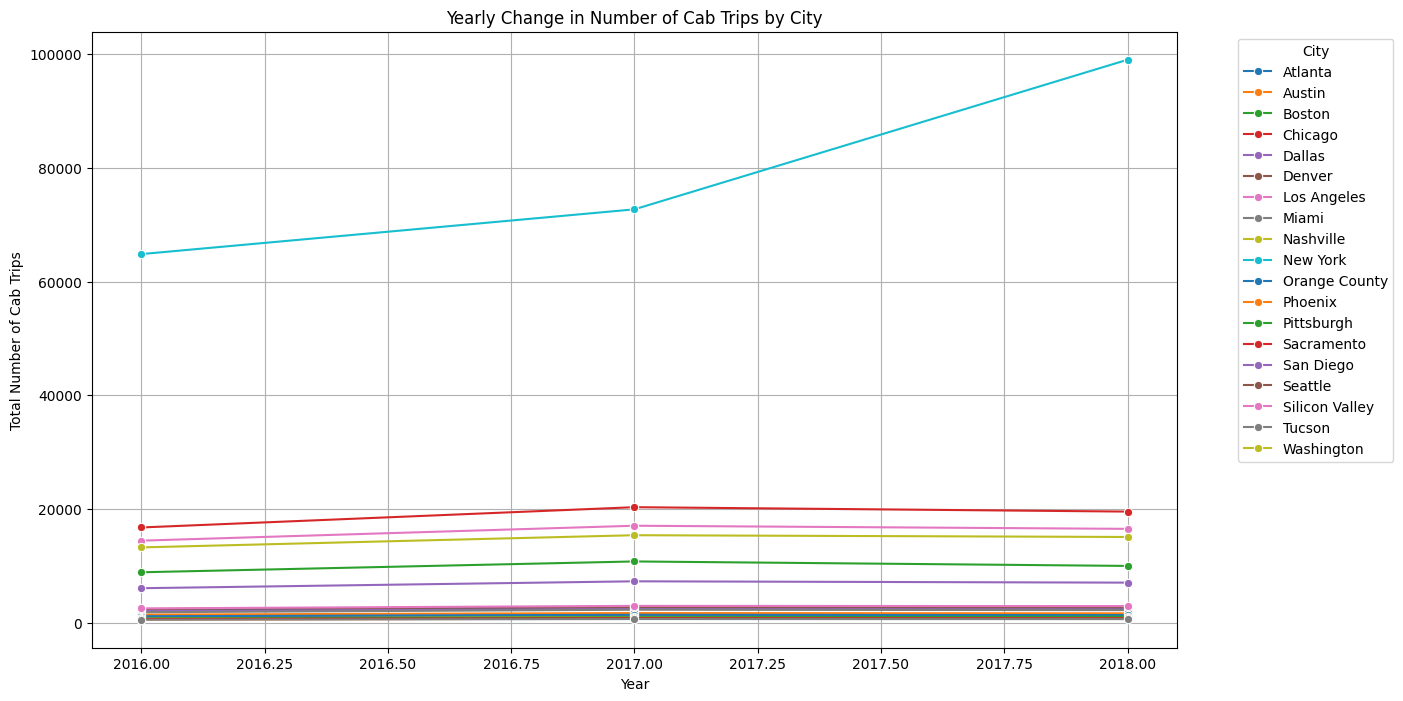

<Figure size 640x480 with 0 Axes>

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by City and Year, then calculate the total number of trips
yearly_city_trip_data = master_data.groupby(['City', 'Year']).agg({
    'Transaction ID': 'count',
    'Average Growth Rate': 'mean'
}).rename(columns={'Transaction ID': 'Total Trips'}).reset_index()

# Plotting the line plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=yearly_city_trip_data, x='Year', y='Total Trips', hue='City', marker='o', palette='tab10')
plt.title('Yearly Change in Number of Cab Trips by City')
plt.xlabel('Year')
plt.ylabel('Total Number of Cab Trips')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("C:/Users/steph/Downloads/Data Glacier/DataSets-main/data/charts/yearly_trip_change_by_city.png")


Interpretation: The line chart demonstrates that New York consistently shows a substantial increase in the number of cab trips year over year, far outpacing other cities. Other cities like Chicago, Los Angeles, and Washington show steady but much smaller increases in cab usage. Most other cities have relatively flat or minimal growth trends over the years.

Recommendation: XYZ should prioritize investment in New York due to its significant and consistent growth in cab usage, suggesting a strong and expanding market. Secondary consideration could be given to other major cities like Chicago, Los Angeles, and Washington for their steady growth, though they present less immediate opportunity compared to New York.

### Hypothesis 3 Conclusion

The data suggests that while there is some correlation between population growth rates and cab demand, it is not a strong or consistent relationship. Cities like New York, which show high cab usage, do not necessarily align with the highest population growth rates. In contrast, some cities with higher population growth, such as Seattle, do not exhibit proportionately high cab usage. Therefore, while population growth can be a contributing factor to cab demand, it is not the sole or most reliable indicator. 

Recommendation:XYZ should consider other factors, such as existing market size and trends in cab usage, when deciding where to invest.

#### Price Sensitivity:
Hypothesis 4: Higher prices per kilometer result in lower usage of cab services.

In [146]:
# Scatter Plot: Price per KM vs. Number of Trips

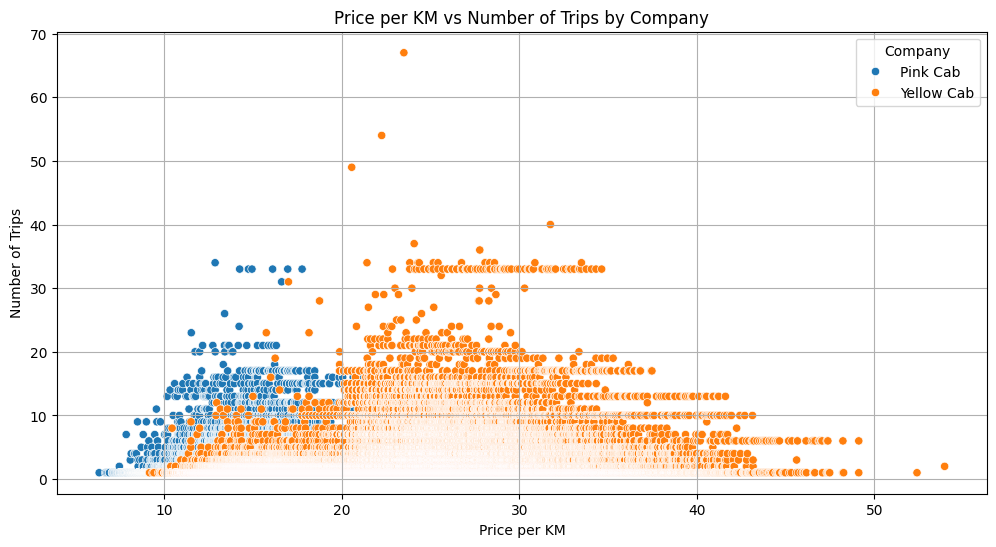

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping data by Company and Price per KM to count the number of trips
price_trip_data = master_data.groupby(['Company', 'Price per KM']).size().reset_index(name='Number of Trips')

# Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=price_trip_data, x='Price per KM', y='Number of Trips', hue='Company')
plt.title('Price per KM vs Number of Trips by Company')
plt.xlabel('Price per KM')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()


Interpretation: The scatter plot indicates that Yellow Cab has a broader distribution of trips across a wider range of prices per kilometer compared to Pink Cab. Yellow Cab tends to dominate in higher price brackets (above 20 per KM), whereas Pink Cab's trips are more concentrated in the lower price ranges (below 20 per KM). The number of trips for both companies generally decreases as the price per kilometer increases.

Recommendation: XYZ should consider that Yellow Cab captures a larger share of the market in the higher price per kilometer segments, which could indicate a more premium service or higher willingness to pay among its customers. Investing in Yellow Cab might provide higher returns due to its ability to sustain demand even at higher prices. However, if XYZ wants to tap into a more price-sensitive market, Pink Cab, with its lower price per kilometer focus, might be a better fit.

In [148]:
# Box Plot: Price per KM Distribution

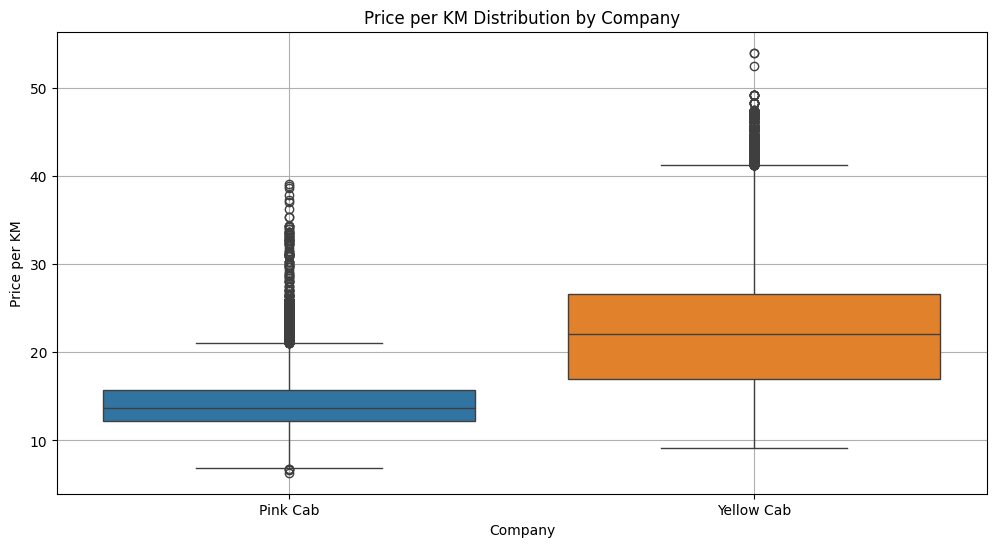

In [149]:
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=master_data, x='Company', y='Price per KM', hue='Company')
plt.title('Price per KM Distribution by Company')
plt.xlabel('Company')
plt.ylabel('Price per KM')
plt.grid(True)
plt.show()


Interpretation: The box plot shows that Yellow Cab generally charges higher prices per kilometer compared to Pink Cab. The median price per kilometer for Yellow Cab is significantly higher, with a broader range of prices and more variability. Pink Cab’s pricing is more concentrated within a lower range, with fewer outliers.

Recommendation: XYZ should consider that Yellow Cab operates in a higher pricing segment, which may reflect a premium service or a customer base willing to pay more for cab services. Investing in Yellow Cab could be beneficial if the goal is to target higher-end markets. However, if the strategy is to appeal to a more price-sensitive or budget-conscious customer base, Pink Cab would be the better option due to its lower and more consistent pricing.

In [150]:
# Line Plot: Average Price per KM and Number of Trips Over the Years

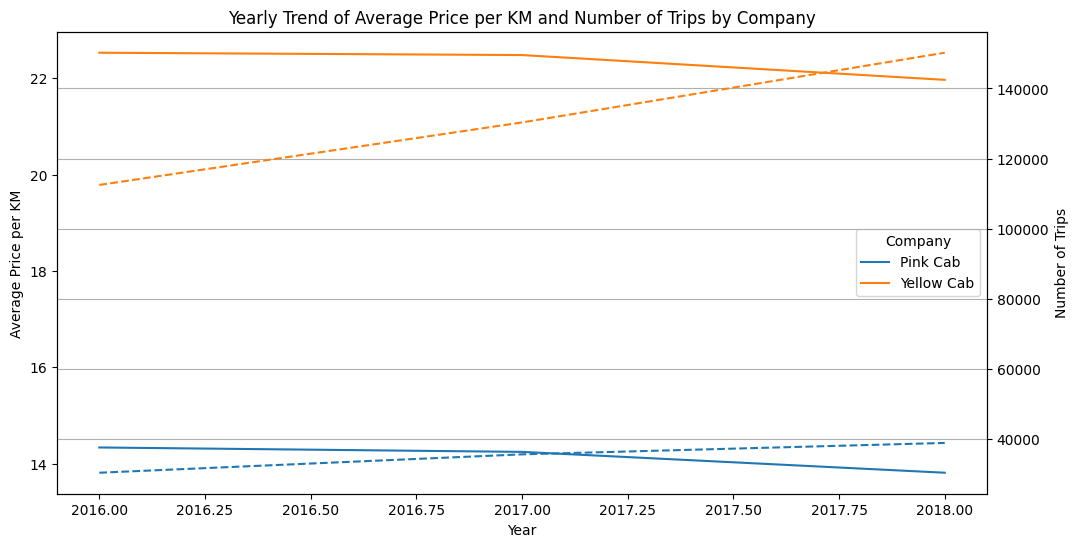

In [151]:
# Grouping data by Year and Company to calculate average Price per KM and count the number of trips
yearly_price_trip_data = master_data.groupby(['Year', 'Company']).agg({
    'Price per KM': 'mean',
    'Transaction ID': 'count'
}).reset_index().rename(columns={'Transaction ID': 'Number of Trips'})

# Line Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Average Price per KM
sns.lineplot(data=yearly_price_trip_data, x='Year', y='Price per KM', hue='Company', ax=ax1)
ax1.set_ylabel('Average Price per KM')
ax1.set_title('Yearly Trend of Average Price per KM and Number of Trips by Company')

# Creating a secondary y-axis for Number of Trips
ax2 = ax1.twinx()
sns.lineplot(data=yearly_price_trip_data, x='Year', y='Number of Trips', hue='Company', ax=ax2, linestyle='--', legend=False)
ax2.set_ylabel('Number of Trips')

plt.grid(True)
plt.show()


Interpretation: Over the years, Yellow Cab has consistently maintained a higher average price per kilometer than Pink Cab. Despite this higher pricing, Yellow Cab also shows a higher number of trips, although there is a slight decline in trips towards the end of the period. Pink Cab’s average price per kilometer is lower and relatively stable, with a slight increase in the number of trips over time.

Recommendation: XYZ should consider Yellow Cab if they aim to invest in a company with a higher revenue per kilometer and a strong customer base that sustains a higher price point. However, the slight decline in the number of trips for Yellow Cab may need to be monitored and addressed through targeted marketing or customer retention strategies. Pink Cab could be a better investment if XYZ prefers a company with more stable pricing and potential for growth in trip numbers at a lower price point.

### Hypothesis 4 Conclusion
The analysis shows that Yellow Cab maintains higher prices per kilometer compared to Pink Cab, yet it also records a higher number of trips. This suggests that Yellow Cab's customer base is less sensitive to price increases, indicating that the demand for its services remains strong even with higher pricing. On the other hand, Pink Cab, with its lower price per kilometer, attracts fewer trips overall, which might imply that it caters to a more price-sensitive segment of the market.

Recommendation: Given the data, XYZ should consider investing in Yellow Cab, as it demonstrates a strong customer base that is less sensitive to higher pricing, translating into higher revenue per kilometer and a robust overall business model

### Hypothesis: Repeat Customers
Hypothesis 5: Customers are more likely to reuse the same cab company if they have used it multiple times in the past.

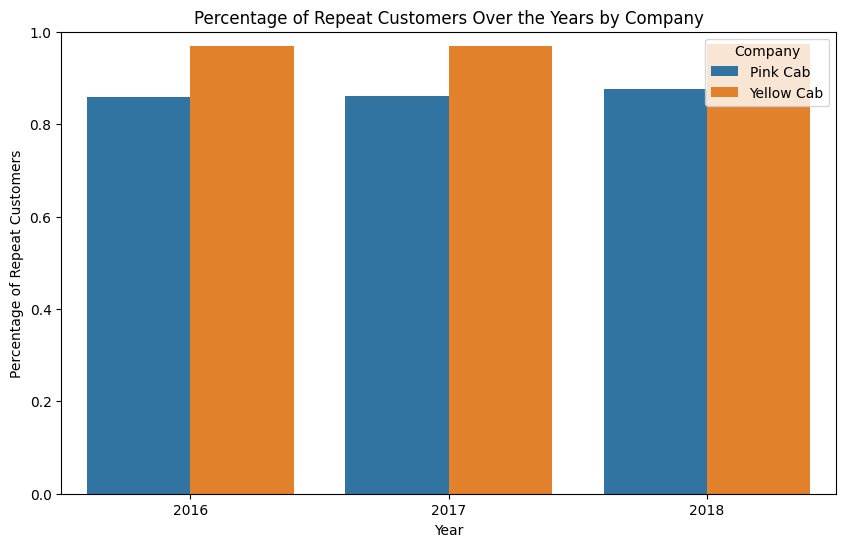

In [152]:
# Bar chart for the percentage of repeat customers over the years

# Group by company and year to calculate the percentage of repeat customers
repeat_customers = master_data.groupby(['Company', 'Year']).agg({
    'Repeat Customer Flag': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=repeat_customers, x='Year', y='Repeat Customer Flag', hue='Company')
plt.title('Percentage of Repeat Customers Over the Years by Company')
plt.ylabel('Percentage of Repeat Customers')
plt.xlabel('Year')
plt.ylim(0, 1)
plt.show()

Interpretation:
The data indicates that Yellow Cab consistently has a higher percentage of repeat customers compared to Pink Cab across all three years (2016-2018). This suggests that Yellow Cab has been more successful in retaining its customers over time, indicating higher customer satisfaction and loyalty.

Recommendation:
XYZ should consider investing in Yellow Cab due to its strong customer retention, which suggests a stable and loyal customer base. This could translate to more predictable revenue streams and lower customer acquisition costs in the long term. Pink Cab may require efforts to improve customer satisfaction and retention strategies if XYZ chooses to invest in it.

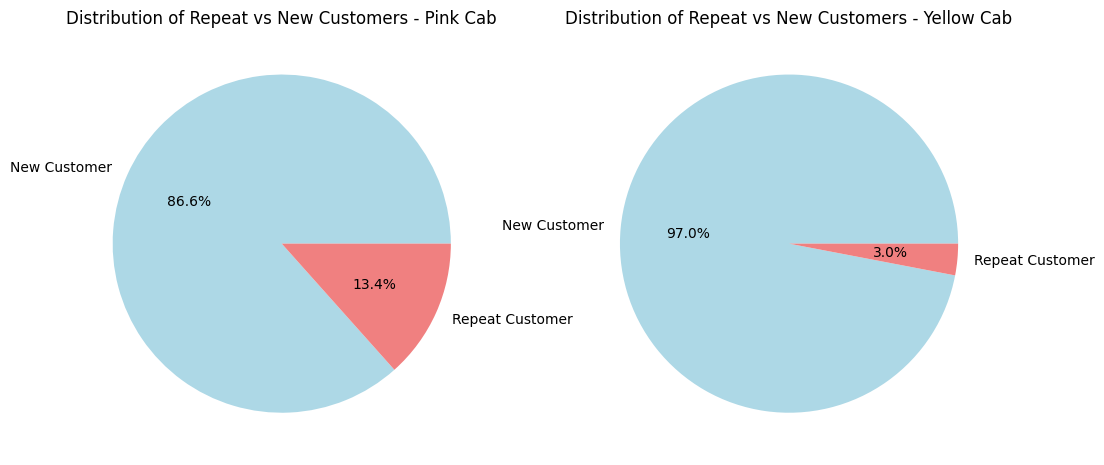

In [153]:
# Pie charts for the distribution of repeat vs new customers for each company
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for i, company in enumerate(master_data['Company'].unique()):
    company_data = master_data[master_data['Company'] == company]
    repeat_counts = company_data['Repeat Customer Flag'].value_counts(normalize=True)
    axs[i].pie(repeat_counts, labels=['New Customer', 'Repeat Customer'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
    axs[i].set_title(f'Distribution of Repeat vs New Customers - {company}')

plt.show()

Interpretation:
The visual shows that Pink Cab has a higher percentage of repeat customers (13.4%) compared to Yellow Cab (3.0%). However, the majority of both companies' customer bases are new customers, with Yellow Cab having a significantly higher percentage of new customers (97.0%) compared to Pink Cab (86.6%).

Recommendation:
XYZ should consider investing in Pink Cab, as it demonstrates a stronger ability to retain customers despite a smaller overall customer base. However, the larger influx of new customers for Yellow Cab also suggests growth potential. If XYZ prioritizes customer retention and long-term value, Pink Cab may be the better choice. If the goal is rapid market expansion, Yellow Cab could be a stronger candidate.

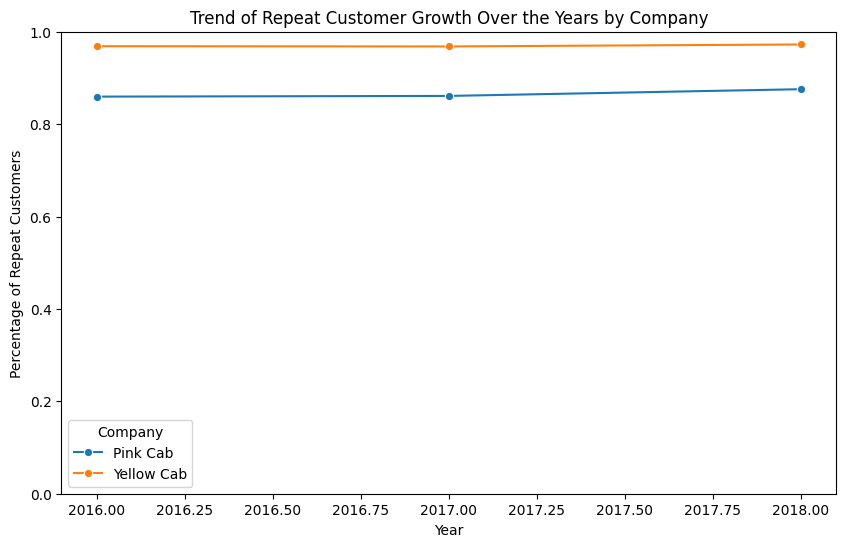

In [154]:
# Line plot for the trend of repeat customer growth over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=repeat_customers, x='Year', y='Repeat Customer Flag', hue='Company', marker='o')
plt.title('Trend of Repeat Customer Growth Over the Years by Company')
plt.ylabel('Percentage of Repeat Customers')
plt.xlabel('Year')
plt.ylim(0, 1)
plt.show()

Interpretation:
The trend line indicates that the percentage of repeat customers for both Pink Cab and Yellow Cab has remained relatively stable over the years, with Yellow Cab consistently having a higher percentage of repeat customers compared to Pink Cab.

Recommendation:
XYZ should consider the consistent repeat customer base of Yellow Cab as a strong indicator of customer loyalty. Investing in Yellow Cab might be advantageous if maintaining a loyal customer base is a priority. However, Pink Cab's growing trend, although starting from a lower base, suggests potential for improving customer retention strategies, which could be an area of growth if XYZ is willing to invest in enhancing customer experience and loyalty programs.

### Hypothesis 5 Conclusion
The analysis confirms that customers are highly likely to reuse the same cab company, especially with Yellow Cab, which has an exceptionally high percentage of repeat customers consistently over the years. Pink Cab also shows a strong but slightly lower repeat customer rate, indicating that once customers choose a cab service, they tend to stick with it.

Recommendation:
XYZ should consider Yellow Cab's strong customer loyalty as a significant asset, making it a solid choice for investment. The company should maintain or enhance customer retention strategies to capitalize on this loyalty. For Pink Cab, there is an opportunity to improve customer retention by focusing on loyalty programs, customer satisfaction, and service consistency, which could increase its repeat customer base and overall market competitiveness.

### Customer Demographics and Cab Usage
Hypothesis 6: Cab usage patterns vary based on customer demographics such as age, gender, and income.

C:\Users\steph\AppData\Local\Temp\ipykernel_46380\3469793380.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_distribution = master_data.groupby(['Company', 'Age Group']).size().reset_index(name='Number of Trips')


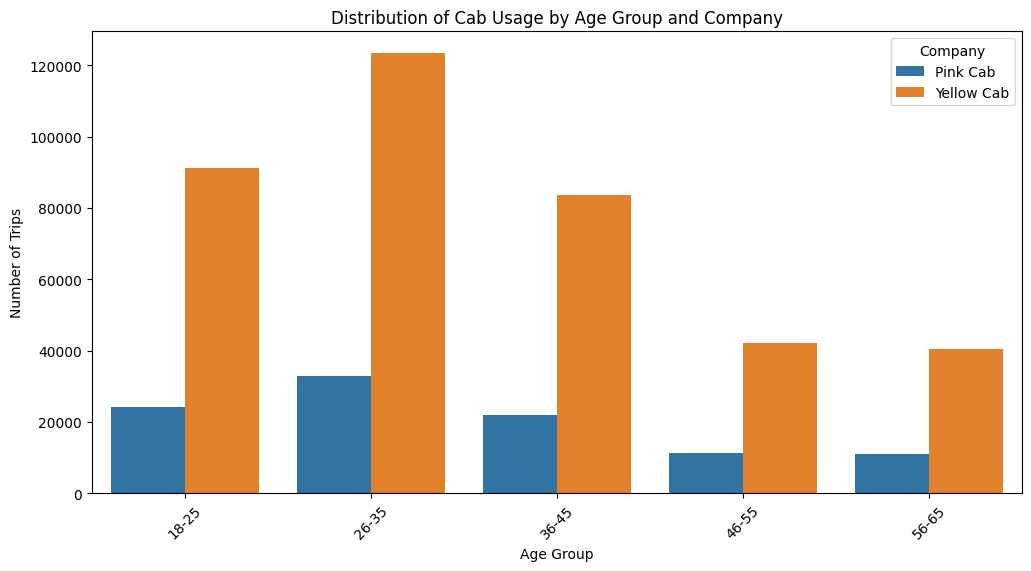

In [155]:
# bar chart that shows the distribution of cab usage across different age groups for each company.
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Company and Age Group to get the number of trips
age_distribution = master_data.groupby(['Company', 'Age Group']).size().reset_index(name='Number of Trips')

# Plot the age distribution
plt.figure(figsize=(12, 6))
sns.barplot(x='Age Group', y='Number of Trips', hue='Company', data=age_distribution)
plt.title('Distribution of Cab Usage by Age Group and Company')
plt.xlabel('Age Group')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()


Interpretation:
The data shows that the majority of cab usage is dominated by the 26-35 age group for both Pink Cab and Yellow Cab, with Yellow Cab having significantly higher numbers in all age groups compared to Pink Cab. The 18-25 and 36-45 age groups also show considerable usage, especially for Yellow Cab. The usage drops notably in the older age groups (46-55 and 56-65).

Recommendation:
XYZ should target marketing efforts and service improvements towards the 26-35 age group, as they are the largest user base for both companies. Yellow Cab’s strong presence across all age groups suggests it has broader appeal, which could be leveraged in promotional campaigns. Pink Cab may benefit from strategies to attract more users from the 26-35 age group and beyond, perhaps through targeted promotions or loyalty programs aimed at younger adults.

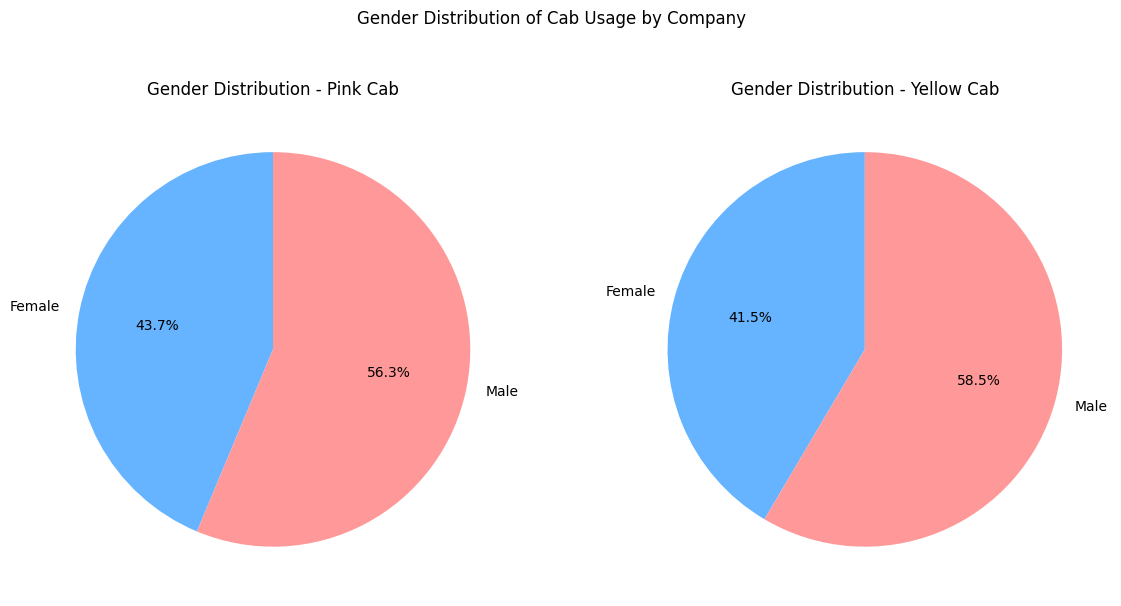

In [156]:
# pie charts showing the gender distribution for each company.
# Group by Company and Gender to get the number of trips
gender_distribution = master_data.groupby(['Company', 'Gender']).size().reset_index(name='Number of Trips')

# Plot the gender distribution as pie charts
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

for i, company in enumerate(gender_distribution['Company'].unique()):
    data = gender_distribution[gender_distribution['Company'] == company]
    axes[i].pie(data['Number of Trips'], labels=data['Gender'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
    axes[i].set_title(f'Gender Distribution - {company}')

plt.suptitle('Gender Distribution of Cab Usage by Company')
plt.show()


C:\Users\steph\AppData\Local\Temp\ipykernel_46380\3281583798.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_distribution = master_data.groupby(['Company', 'Income Category']).size().reset_index(name='Number of Trips')


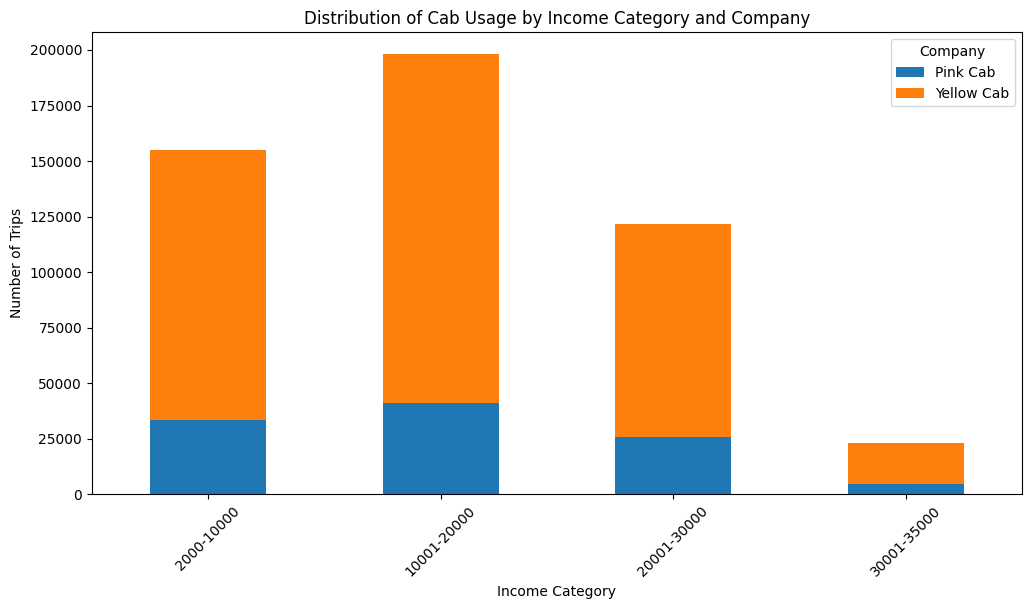

In [157]:
# stacked bar chart showing the distribution of cab usage across different income categories for each company

# Group by Company and Income Category to get the number of trips
income_distribution = master_data.groupby(['Company', 'Income Category']).size().reset_index(name='Number of Trips')

# Pivot the data for stacked bar plot
income_pivot = income_distribution.pivot(index='Income Category', columns='Company', values='Number of Trips')

# Plot the income category distribution as a stacked bar chart
income_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Cab Usage by Income Category and Company')
plt.xlabel('Income Category')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()


Interpretation:
The distribution of cab usage across income categories reveals that the majority of trips are made by customers in the $10,001-$20,000 income category, followed by those in the $20,001-$30,000 category. Yellow Cab dominates across all income categories, with a particularly large share in the $10,001-$20,000 range. Pink Cab, while less dominant, still captures a notable share in the lower income categories, particularly under $20,000.

Recommendation:
XYZ should consider focusing on the middle-income market, specifically targeting customers earning between $10,001 and $30,000, as they represent the highest demand for cab services. Yellow Cab's strong position in this segment suggests that it is already appealing to these income groups, so any investment in Yellow Cab would benefit from this existing customer base. Pink Cab could benefit from tailored marketing strategies to attract more users in the higher income brackets, potentially by offering premium services or loyalty incentives.

### Hypothesis 6 Conclusion:
The analysis confirms that cab usage patterns indeed vary based on customer demographics such as age and income. Yellow Cab consistently attracts a higher number of customers across all age groups, particularly among those aged 26-45. Income-wise, the $10,001-$30,000 bracket shows the highest demand for cab services, with Yellow Cab capturing a significant share of this market. Pink Cab, while capturing a smaller portion, is more favored by younger and lower-income customers, suggesting a differentiation in customer preferences between the two companies.

Recommendation:
XYZ should consider investing in Yellow Cab due to its strong appeal across a wide range of demographics, particularly in the lucrative middle-income segment and among prime working-age adults. If targeting a more niche market, Pink Cab could be an option, especially if the goal is to grow its share among younger or lower-income customers. Developing targeted marketing strategies that align with the demographic strengths of each company could help maximize returns on investment.

### Seasonal Trends in Cab Usage
Hypothesis 7: Some seasons have relatively higher trips

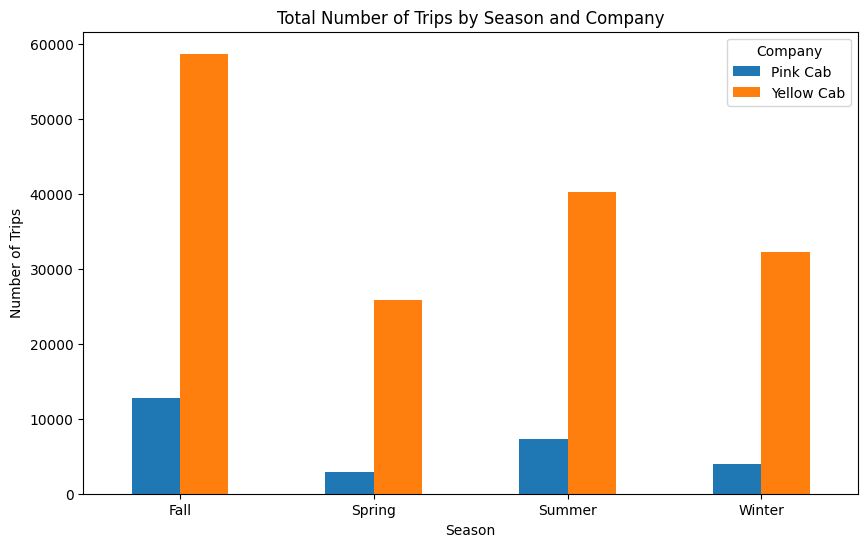

In [158]:
# Bar Chart: Total number of trips by season and company
season_trip_count = master_data.groupby(['Season Identifier', 'Company'])['Transaction ID'].count().unstack()
season_trip_count.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Total Number of Trips by Season and Company')
plt.ylabel('Number of Trips')
plt.xlabel('Season')
plt.xticks(rotation=0)
plt.legend(title='Company')
plt.show()

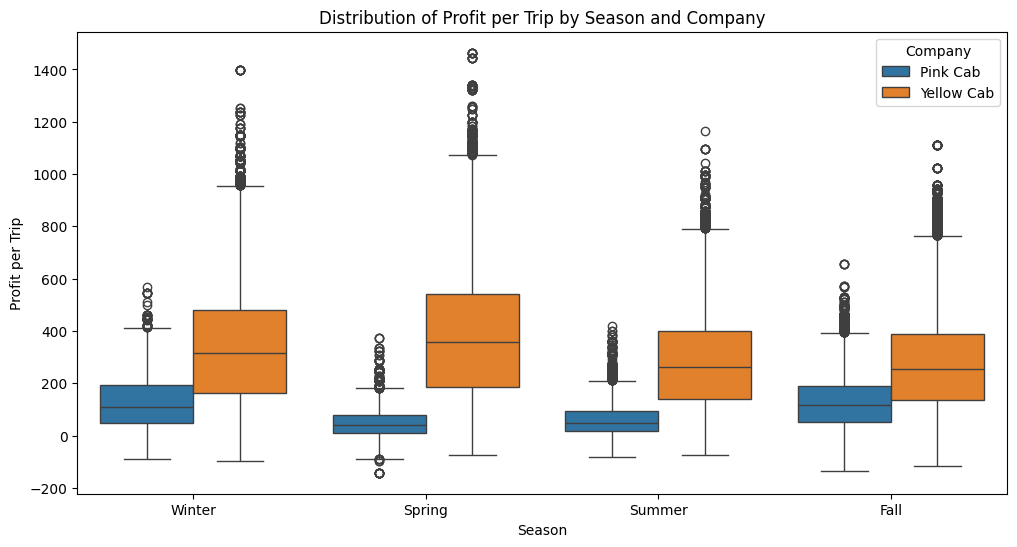

In [159]:
# Box Plot: Distribution of profit per trip by season and company
plt.figure(figsize=(12, 6))
sns.boxplot(x='Season Identifier', y='Profit per Trip', hue='Company', data=master_data)
plt.title('Distribution of Profit per Trip by Season and Company')
plt.ylabel('Profit per Trip')
plt.xlabel('Season')
plt.show()

Interpretation:
Yellow Cab consistently achieves higher profit per trip across all seasons compared to Pink Cab. The profits are particularly strong in the winter and fall seasons for Yellow Cab, while Pink Cab maintains a lower but more stable profit distribution across seasons. Notably, there is significant variability in profit for Yellow Cab, with a wider range of profits and some higher outliers, especially in winter and fall.

Recommendation:
XYZ should consider investing in Yellow Cab due to its higher profitability across all seasons, particularly in the winter and fall. The variability in profits suggests that Yellow Cab has the potential for substantial earnings, even though it may also face some risks with lower profit trips. XYZ might explore strategies to reduce the lower-end variability while maintaining high profitability, possibly by optimizing pricing or focusing on high-demand areas during these profitable seasons.

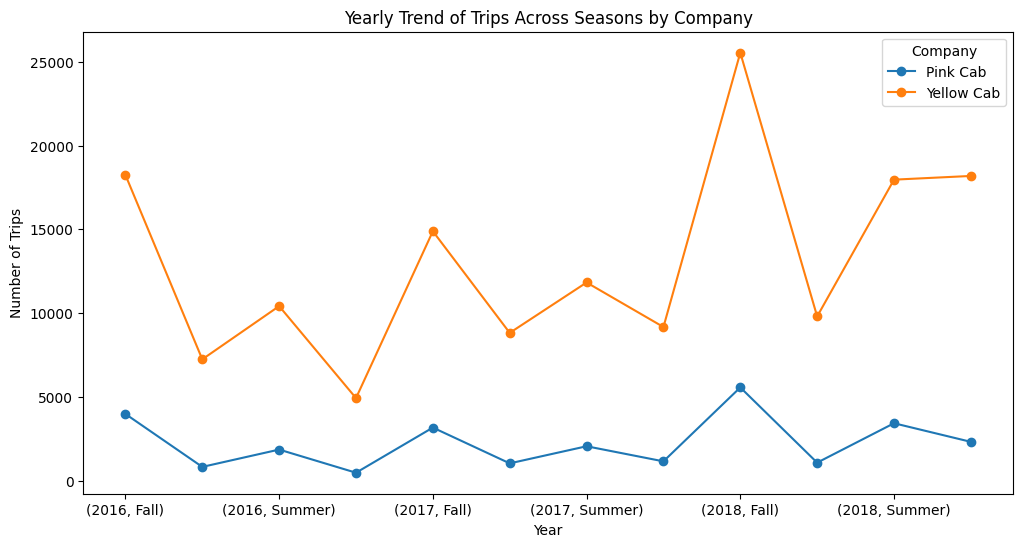

In [160]:
# Line Plot: Trend of trips over the seasons across the years for each company
season_yearly_trend = master_data.groupby(['Year', 'Season Identifier', 'Company'])['Transaction ID'].count().unstack()
season_yearly_trend.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Yearly Trend of Trips Across Seasons by Company')
plt.ylabel('Number of Trips')
plt.xlabel('Year')
plt.legend(title='Company')
plt.show()

Visualization: Yearly Trend of Trips Across Seasons by Company

Interpretation:

The trend shows that Yellow Cab experiences more fluctuations in the number of trips across different seasons compared to Pink Cab. Yellow Cab peaks in fall 2018 with the highest number of trips but has lower performance in other seasons.
Pink Cab's trips are more consistent throughout the seasons, with less variation, although the number of trips remains significantly lower than Yellow Cab.

Recommendation:

XYZ should consider the seasonal fluctuations in Yellow Cab's performance when planning investments or resource allocation. Yellow Cab may offer higher returns in peak seasons, particularly in fall, but could require strategies to mitigate lower performance in other seasons.
Pink Cab, while more stable, may need efforts to increase the total number of trips, potentially through targeted marketing or promotions to improve performance during off-peak seasons.

### Hypothesis 7 Conclusion:
The analysis confirms that cab usage patterns indeed vary based on customer demographics such as age and income. Yellow Cab consistently attracts a higher number of customers across all age groups, particularly among those aged 26-45. Income-wise, the 
30,000 bracket shows the highest demand for cab services, with Yellow Cab capturing a significant share of this market. Pink Cab, while capturing a smaller portion, is more favored by younger and lower-income customers, suggesting a differentiation in customer preferences between the two companies.

Recommendation: XYZ should consider investing in Yellow Cab due to its strong appeal across a wide range of demographics, particularly in the lucrative middle-income segment and among prime working-age adults. If targeting a more niche market, Pink Cab could be an option, especially if the goal is to grow its share among younger or lower-income customers. Developing targeted marketing strategies that align with the demographic strengths of each company could help maximize returns on investment.

# Key Recommendations for XYZ:

## Market Share and Profitability:

Invest in Yellow Cab: Yellow Cab dominates the market with a higher market share and profitability across most metrics. It offers a more stable return, particularly during non-holiday periods and in cities with lower population growth rates.

## Price Sensitivity:

Monitor Pricing Strategies: Yellow Cab can afford higher prices per kilometer without significantly affecting the number of trips. However, Pink Cab should consider lowering prices to attract more customers, as it is more sensitive to price changes.

## Customer Retention:

Focus on Repeat Customers: Both companies have a high percentage of repeat customers, with Yellow Cab leading slightly. Efforts to maintain and increase customer loyalty should be prioritized, as repeat customers are crucial for sustained revenue.

## Demographic Targeting:

Target Younger and Middle-Income Groups: Cab usage is highest among the 26-35 age group and those earning between $10,001 and $20,000 per month. Marketing and service enhancements should focus on these demographics to maximize usage.

## Seasonal Strategy:

Prepare for Seasonal Variations: Yellow Cab experiences significant seasonal fluctuations, particularly in fall. XYZ should prepare for these peaks by allocating resources appropriately, while Pink Cab’s more consistent performance could benefit from efforts to increase demand during off-peak seasons.

## Weather Impact:

Weather-Responsive Services: The number of trips and profits are heavily influenced by weather conditions. XYZ should explore services or promotions that cater to customers during adverse weather, particularly rain, which sees the highest demand.

# Github link with notebook and data intake repots

https://github.com/stephandoh/Sondoh_Glacier/tree/main/Week_2